In [ ]:
!pip install scikit-learn==1.3.2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer,OrdinalEncoder,LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_data.csv')

In [ ]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1413701, 158)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [ ]:
for column in df.columns:
    print(column)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
NAME_TYPE_SUITE_x
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVING

In [ ]:
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE_x,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
DAYS_FIRST_DUE,float64
DAYS_LAST_DUE_1ST_VERSION,float64
DAYS_LAST_DUE,float64
DAYS_TERMINATION,float64


In [ ]:
df.isna().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE_x,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
DAYS_FIRST_DUE,561106
DAYS_LAST_DUE_1ST_VERSION,561106
DAYS_LAST_DUE,561106
DAYS_TERMINATION,561106


In [ ]:
df['WEEKDAY_APPR_PROCESS_START_x']


,WEEKDAY_APPR_PROCESS_START_x
0,WEDNESDAY
1,MONDAY
2,MONDAY
3,MONDAY
4,MONDAY
...,...
1413696,THURSDAY
1413697,THURSDAY
1413698,THURSDAY
1413699,THURSDAY


In [ ]:
df['DAYS_LAST_PHONE_CHANGE']

,DAYS_LAST_PHONE_CHANGE
0,-1134.0
1,-828.0
2,-828.0
3,-828.0
4,-815.0
...,...
1413696,-787.0
1413697,-787.0
1413698,-787.0
1413699,-787.0


In [ ]:
d = df.isnull().mean() * 100


# Convert to DataFrame for better readability
d_df = d.reset_index()
d_df.columns = ['Column', 'Missing_Percentage']

pd.set_option('display.max_rows', None)

# Display the DataFrame
print(d_df)

                           Column  Missing_Percentage
0                      SK_ID_CURR            0.000000
1                          TARGET            0.000000
2            NAME_CONTRACT_TYPE_x            0.000000
3                     CODE_GENDER            0.000000
4                    FLAG_OWN_CAR            0.000000
5                 FLAG_OWN_REALTY            0.000000
6                    CNT_CHILDREN            0.000000
7                AMT_INCOME_TOTAL            0.000000
8                    AMT_CREDIT_x            0.000000
9                   AMT_ANNUITY_x            0.006578
10              AMT_GOODS_PRICE_x            0.085449
11              NAME_TYPE_SUITE_x            0.249416
12               NAME_INCOME_TYPE            0.000000
13            NAME_EDUCATION_TYPE            0.000000
14             NAME_FAMILY_STATUS            0.000000
15              NAME_HOUSING_TYPE            0.000000
16     REGION_POPULATION_RELATIVE            0.000000
17                     DAYS_

In [ ]:
d.sort_values(ascending=False).reset_index().iloc[0:60]


,index,0
0,RATE_INTEREST_PRIVILEGED,99.661102
1,RATE_INTEREST_PRIMARY,99.661102
2,COMMONAREA_MODE,69.689347
3,COMMONAREA_MEDI,69.689347
4,COMMONAREA_AVG,69.689347
5,NONLIVINGAPARTMENTS_MEDI,69.296549
6,NONLIVINGAPARTMENTS_AVG,69.296549
7,NONLIVINGAPARTMENTS_MODE,69.296549
8,FONDKAPREMONT_MODE,68.216264
9,LIVINGAPARTMENTS_MODE,68.214566


In [ ]:
df1 = df.copy()


In [ ]:
df1.shape

(1413701, 158)

 The features listed are relevant because they provide comprehensive information about the applicants, their financial status, and their behavior, which are crucial for assessing credit risk.

In [ ]:
relevant_features = [
    'TARGET',
'CODE_GENDER',
'DAYS_BIRTH',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT_x',
'AMT_ANNUITY_x',
'AMT_GOODS_PRICE_x',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_EMPLOYED',
'OCCUPATION_TYPE',
'CNT_FAM_MEMBERS',
'REGION_RATING_CLIENT',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'FLAG_MOBIL',
'FLAG_WORK_PHONE',
'FLAG_PHONE',
'FLAG_EMAIL',
'DAYS_LAST_PHONE_CHANGE',
'WEEKDAY_APPR_PROCESS_START_x',
'HOUR_APPR_PROCESS_START_x',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'NAME_CONTRACT_TYPE_x',
'ORGANIZATION_TYPE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_MON',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'NAME_CONTRACT_STATUS'
]

In [ ]:
len(relevant_features)

40

In [ ]:
df11 =df1[relevant_features]


In [ ]:
df11.columns


Index(['TARGET', 'CODE_GENDER', 'DAYS_BIRTH', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE_x', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_STATUS'],
      dtype='object')

Also These columns provide a balanced view of demographic, financial, employment, and behavioral information, which are essential for assessing credit risk and making informed lending decisions.








In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   TARGET                        1413701 non-null  int64  
 1   CODE_GENDER                   1413701 non-null  object 
 2   DAYS_BIRTH                    1413701 non-null  int64  
 3   FLAG_OWN_CAR                  1413701 non-null  object 
 4   FLAG_OWN_REALTY               1413701 non-null  object 
 5   CNT_CHILDREN                  1413701 non-null  int64  
 6   AMT_INCOME_TOTAL              1413701 non-null  float64
 7   AMT_CREDIT_x                  1413701 non-null  float64
 8   AMT_ANNUITY_x                 1413608 non-null  float64
 9   AMT_GOODS_PRICE_x             1412493 non-null  float64
 10  NAME_INCOME_TYPE              1413701 non-null  object 
 11  NAME_EDUCATION_TYPE           1413701 non-null  object 
 12  NAME_FAMILY_STATUS          

In [ ]:
df11.isna().mean().sort_values(ascending=False).head(5)

,0
EXT_SOURCE_1,0.563669
OCCUPATION_TYPE,0.323675
EXT_SOURCE_3,0.171070
AMT_REQ_CREDIT_BUREAU_MON,0.115744
AMT_REQ_CREDIT_BUREAU_YEAR,0.115744


In [ ]:
df11['EXT_SOURCE_1'].head(5)

,EXT_SOURCE_1
0,0.083037
1,0.311267
2,0.311267
3,0.311267
4,NaN


In [ ]:
df11['EXT_SOURCE_2'].head(15)

,EXT_SOURCE_2
0,0.262949
1,0.622246
2,0.622246
3,0.622246
4,0.555912
5,0.650442
6,0.650442
7,0.650442
8,0.650442
9,0.650442


In [ ]:
#Dropping EXT_SOURCE_1 & EXT_SOURCE_2 as it may correlate with other similar columns

df11.drop(columns=['EXT_SOURCE_1','EXT_SOURCE_2'],inplace=True)

In [ ]:
df11['EXT_SOURCE_3'].fillna(df11['EXT_SOURCE_3'].median(),inplace=True)


In [ ]:
df11['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'Cooking staff', 'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
#Dropping NA values from Occupation Type

df11.dropna(subset=["OCCUPATION_TYPE"], inplace=True)  # drop null columns


In [ ]:
df11.isna().mean().sort_values(ascending=False).head(5)*100

,0
AMT_REQ_CREDIT_BUREAU_MON,11.492792
AMT_REQ_CREDIT_BUREAU_YEAR,11.492792
DEF_30_CNT_SOCIAL_CIRCLE,0.219951
OBS_30_CNT_SOCIAL_CIRCLE,0.219951
AMT_GOODS_PRICE_x,0.098000


In [ ]:
df11.isna().mean()

,0
TARGET,0.000000
CODE_GENDER,0.000000
DAYS_BIRTH,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT_x,0.000000
AMT_ANNUITY_x,0.000097
AMT_GOODS_PRICE_x,0.000980


In [ ]:
df11.columns

Index(['TARGET', 'CODE_GENDER', 'DAYS_BIRTH', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'EXT_SOURCE_3', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_CONTRACT_TYPE_x', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_STATUS'],
      dtype='object')

In [ ]:
df11.shape

(956121, 38)

In [ ]:
df11["TARGET"].value_counts()

,count
TARGET,
0,865635
1,90486


In [ ]:
#Extracting this filtered data into separate csv file

df11.to_csv('cleaned_data.csv',index=False)


In [ ]:
df2 = pd.read_csv('cleaned_data.csv')

In [ ]:
df2.head(10)

,TARGET,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE_x,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_STATUS
0,1,M,-9461,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,Cash loans,Business Entity Type 3,1.0,0.0,2.0,2.0,Approved
1,0,F,-16765,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,Cash loans,School,0.0,0.0,1.0,0.0,Approved
2,0,F,-16765,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,Cash loans,School,0.0,0.0,1.0,0.0,Approved
3,0,F,-16765,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,Cash loans,School,0.0,0.0,1.0,0.0,Approved
4,0,M,-19046,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,Revolving loans,Government,0.0,0.0,0.0,0.0,Approved
5,0,F,-19005,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Cash loans,Business Entity Type 3,NaN,NaN,2.0,0.0,Approved
6,0,F,-19005,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Cash loans,Business Entity Type 3,NaN,NaN,2.0,0.0,Canceled
7,0,F,-19005,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Cash loans,Business Entity Type 3,NaN,NaN,2.0,0.0,Approved
8,0,F,-19005,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Cash loans,Business Entity Type 3,NaN,NaN,2.0,0.0,Approved
9,0,F,-19005,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,Cash loans,Business Entity Type 3,NaN,NaN,2.0,0.0,Approved


In [ ]:
df2.shape

(956121, 38)

In [ ]:
df2[df2['TARGET']==1].head(10)

,TARGET,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE_x,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_STATUS
0,1,M,-9461,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,Cash loans,Business Entity Type 3,1.0,0.0,2.0,2.0,Approved
125,1,M,-17482,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0,Cash loans,Business Entity Type 3,4.0,2.0,0.0,0.0,Approved
126,1,M,-17482,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0,Cash loans,Business Entity Type 3,4.0,2.0,0.0,0.0,Approved
127,1,M,-17482,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0,Cash loans,Business Entity Type 3,4.0,2.0,0.0,0.0,Refused
128,1,M,-17482,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0,Cash loans,Business Entity Type 3,4.0,2.0,0.0,0.0,Approved
129,1,M,-17482,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0,Cash loans,Business Entity Type 3,4.0,2.0,0.0,0.0,Approved
130,1,M,-17482,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0,Cash loans,Business Entity Type 3,4.0,2.0,0.0,0.0,Refused
135,1,F,-13384,N,N,0,135000.0,288873.0,16258.5,238500.0,...,0,0,0,Cash loans,Self-employed,2.0,0.0,1.0,0.0,Approved
136,1,F,-13384,N,N,0,135000.0,288873.0,16258.5,238500.0,...,0,0,0,Cash loans,Self-employed,2.0,0.0,1.0,0.0,Approved
137,1,F,-13384,N,N,0,135000.0,288873.0,16258.5,238500.0,...,0,0,0,Cash loans,Self-employed,2.0,0.0,1.0,0.0,Approved


In [ ]:
df2[df2['TARGET']==1]['OCCUPATION_TYPE'].value_counts()


,count
OCCUPATION_TYPE,
Laborers,28158
Sales staff,15088
Drivers,10125
Core staff,8099
Managers,6770
Security staff,3709
High skill tech staff,3384
Cooking staff,3141
Medicine staff,3019


In [ ]:
df2['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ..., -23072, -21682, -24319])

In [ ]:
df2['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
#Encoding categorical variable

df2["NAME_EDUCATION_TYPE"]= df2["NAME_EDUCATION_TYPE"].map({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4})


In [ ]:
df2['NAME_EDUCATION_TYPE'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df2['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Private service staff',
       'Medicine staff', 'Security staff', 'Cooking staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
df2["OCCUPATION_TYPE"]= OrdinalEncoder().fit_transform(df2[["OCCUPATION_TYPE"]])

In [ ]:
df2["OCCUPATION_TYPE"] = df2["OCCUPATION_TYPE"].astype(int)
df2["OCCUPATION_TYPE"].unique()


array([ 8,  3,  0, 10,  4, 14,  1, 12, 11, 16,  2,  6, 17,  9, 13, 15,  7,
        5])

In [ ]:
df2['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Electricity', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Transport: type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Services',
       'Security Ministries', 'Transport: type 4', 'Industry: type 1',
       'Security', 'Trade: type 2', 'Police', 'Business Entity Type 1',
       'Postal', 'Transport: type 3', 'Agriculture', 'Restaurant',
       'Culture', 'Industry: type 3', 'Hotel', 'Military',
       'Trade: type 3', 'Industry: type 9', 'Bank', 'Trade: type 6',
       'Industry: type 2', 'University', 'Transport: type 1',
       'Industry: type 12', 'Industry: type 4', 'Insurance',
       'Industry: type 7', 'Emergency', 'Mobile', 'Trade: type 1',
       'Industry: type 5', 'Industry: type 10', 'Legal Services',
       'Advertising', 'Trade: type 5', 'Cleaning', 'Industry: type 13',
       'Trade: type 4', 'Telecom', 'Industry: type 

In [ ]:
df2["ORGANIZATION_TYPE"]= OrdinalEncoder().fit_transform(df2[["ORGANIZATION_TYPE"]])

In [ ]:
df2["ORGANIZATION_TYPE"] = df2["ORGANIZATION_TYPE"].astype(int)
df2["ORGANIZATION_TYPE"].unique()

array([ 5, 39, 11, 37, 33,  9, 30,  4, 42, 53,  7, 13, 28, 51, 16, 43, 41,
       55, 14, 40, 46, 34,  3, 35, 54,  1, 38,  8, 20, 12, 31, 47, 26,  2,
       50, 19, 56, 52, 17, 21, 27, 24, 10, 32, 45, 22, 15, 29,  0, 49,  6,
       18, 48, 44, 25, 36, 23, 57])

In [ ]:
df2['NAME_CONTRACT_TYPE_x'].unique()


array(['Cash loans', 'Revolving loans'], dtype=object)

In [ ]:
df2['AMT_GOODS_PRICE_x'].unique()

array([ 351000. , 1129500. ,  135000. ,  297000. ,  513000. ,  454500. ,
       1395000. , 1530000. ,  405000. ,  652500. ,   67500. ,  697500. ,
        679500. ,  247500. ,  387000. ,  270000. ,  157500. ,  927000. ,
        450000. ,  225000. ,  180000. ,  360000. , 1125000. ,  553500. ,
        540000. ,  855000. ,  238500. , 1350000. ,  675000. ,  666000. ,
        517500. , 1588500. , 1080000. ,  900000. , 1035000. ,  463500. ,
        459000. ,  256500. ,  585000. ,  643500. ,  283500. ,  472500. ,
        337500. ,  720000. , 1089000. ,  319500. , 1435500. ,  468000. ,
        535500. ,  198000. ,  445500. ,  144000. ,  166500. ,  967500. ,
        945000. ,  477000. , 1354500. ,  306000. ,  189000. ,  315000. ,
        531000. ,  252000. ,  765000. , 2250000. ,  909000. , 1102500. ,
        787500. ,   90000. ,  427500. ,   81000. ,  522000. , 1575000. ,
        369000. , 1710000. , 1305000. ,  747000. ,  292500. , 1201500. ,
        202500. ,  324000. ,  148500. ,  495000. , 

In [ ]:
df2["OBS_30_CNT_SOCIAL_CIRCLE"]. fillna(df2["OBS_30_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)
df2["DEF_30_CNT_SOCIAL_CIRCLE"]. fillna(df2["DEF_30_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)


df2["AMT_ANNUITY_x"].fillna(df2["AMT_ANNUITY_x"].median(),inplace=True)
df2["AMT_CREDIT_x"].fillna(df2["AMT_CREDIT_x"].median(),inplace=True)
df2["AMT_GOODS_PRICE_x"].fillna(df2["AMT_GOODS_PRICE_x"].median(),inplace=True)
df2["AMT_REQ_CREDIT_BUREAU_MON"].fillna(df2["AMT_REQ_CREDIT_BUREAU_MON"].median(),inplace=True)
df2["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df2["AMT_REQ_CREDIT_BUREAU_YEAR"].median(),inplace=True)
df2["AMT_GOODS_PRICE_x"].fillna(df2["AMT_GOODS_PRICE_x"].median(),inplace=True)
df2['DAYS_LAST_PHONE_CHANGE'].fillna(df2["DAYS_LAST_PHONE_CHANGE"].median(),inplace=True)
df2['DAYS_REGISTRATION'].fillna(df2["DAYS_REGISTRATION"].median(),inplace=True)
df2['DAYS_ID_PUBLISH'].fillna(df2["DAYS_ID_PUBLISH"].median(),inplace=True)


In [ ]:
df2.describe().T # statistical summary


,count,mean,std,min,25%,50%,75%,max
TARGET,956121.0,0.094639,0.292715,0.000000,0.000000,0.00000,0.000000,1.000000e+00
DAYS_BIRTH,956121.0,-14961.033096,3612.126372,-25200.000000,-17667.000000,-14785.00000,-12011.000000,-7.489000e+03
CNT_CHILDREN,956121.0,0.497461,0.765035,0.000000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,956121.0,179799.644959,228781.084935,25650.000000,112500.000000,157500.00000,225000.000000,1.170000e+08
AMT_CREDIT_x,956121.0,597602.809791,385007.685268,45000.000000,284256.000000,518562.00000,808650.000000,4.050000e+06
AMT_ANNUITY_x,956121.0,27755.516189,14009.263039,1980.000000,17509.500000,25960.50000,35523.000000,2.250000e+05
AMT_GOODS_PRICE_x,956121.0,536232.074909,353069.486183,40500.000000,247500.000000,450000.00000,684000.000000,4.050000e+06
NAME_EDUCATION_TYPE,956121.0,0.335433,0.594988,0.000000,0.000000,0.00000,1.000000,4.000000e+00
DAYS_EMPLOYED,956121.0,-2437.763144,2831.328460,-17912.000000,-3240.000000,-1747.00000,-842.000000,3.652430e+05
OCCUPATION_TYPE,956121.0,7.928290,4.424132,0.000000,4.000000,8.00000,11.000000,1.700000e+01


In [ ]:
# fit & transform the encoded variables
df2["NAME_FAMILY_STATUS"]= LabelEncoder().fit_transform(df2[["NAME_FAMILY_STATUS"]])
df2["NAME_CONTRACT_TYPE_x"]= LabelEncoder().fit_transform(df2[["NAME_CONTRACT_TYPE_x"]])
df2["CODE_GENDER"]= LabelEncoder().fit_transform(df2[["CODE_GENDER"]])
df2["FLAG_OWN_CAR"]= LabelEncoder().fit_transform(df2[["FLAG_OWN_CAR"]])
df2["FLAG_OWN_REALTY"]= LabelEncoder().fit_transform(df2[["FLAG_OWN_REALTY"]])
df2["NAME_INCOME_TYPE"]= LabelEncoder().fit_transform(df2[["NAME_INCOME_TYPE"]])
df2["NAME_HOUSING_TYPE"]= LabelEncoder().fit_transform(df2[["NAME_HOUSING_TYPE"]])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956121 entries, 0 to 956120
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        956121 non-null  int64  
 1   CODE_GENDER                   956121 non-null  int64  
 2   DAYS_BIRTH                    956121 non-null  int64  
 3   FLAG_OWN_CAR                  956121 non-null  int64  
 4   FLAG_OWN_REALTY               956121 non-null  int64  
 5   CNT_CHILDREN                  956121 non-null  int64  
 6   AMT_INCOME_TOTAL              956121 non-null  float64
 7   AMT_CREDIT_x                  956121 non-null  float64
 8   AMT_ANNUITY_x                 956121 non-null  float64
 9   AMT_GOODS_PRICE_x             956121 non-null  float64
 10  NAME_INCOME_TYPE              956121 non-null  int64  
 11  NAME_EDUCATION_TYPE           956121 non-null  int64  
 12  NAME_FAMILY_STATUS            956121 non-nul

In [ ]:
# detecting the skewed columns using plot

def skewplot(df2, column):
    plt.figure(figsize=(20, 4))

    # Distplot
    plt.subplot(1, 3, 1)
    sns.distplot(df2[column], kde=True)
    plt.title("Distplot for " + column)


    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(df2[column])
    plt.title("Box plot for " + column)

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(df2[column])
    plt.title("Violin plot for " + column)

    plt.tight_layout()
    plt.show()

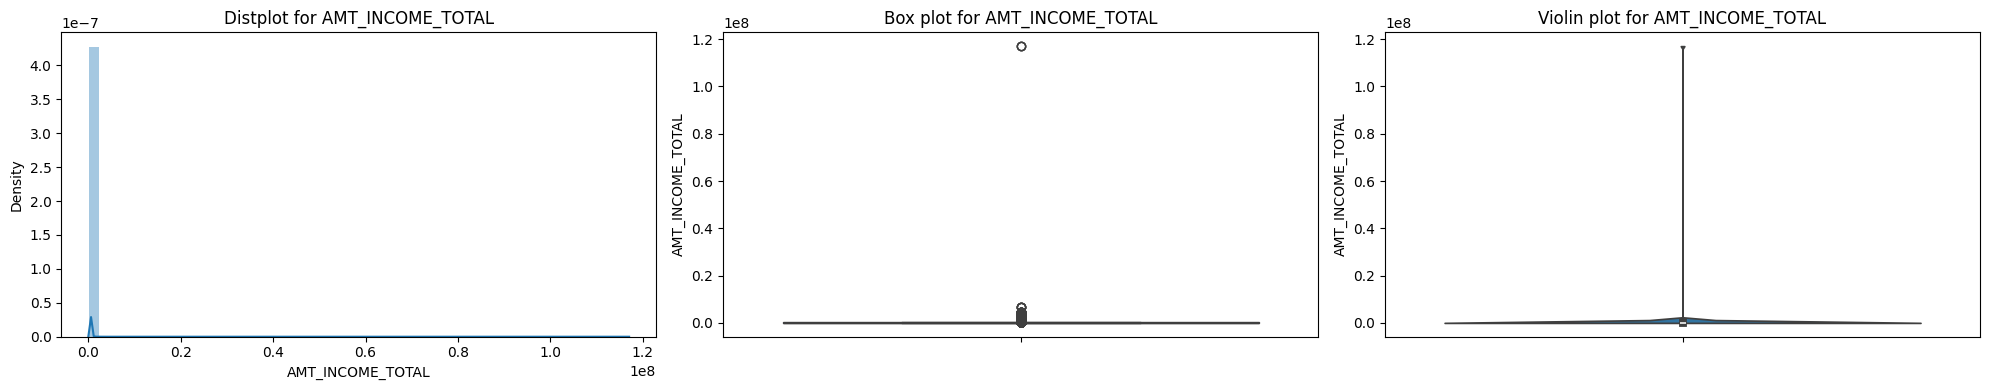

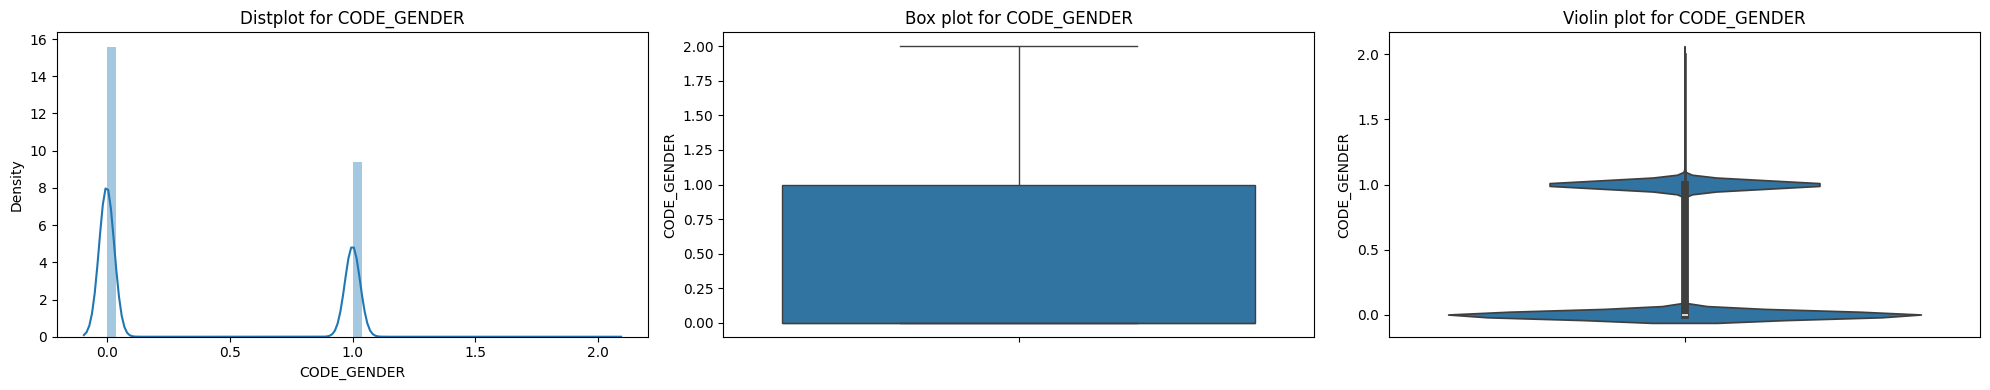

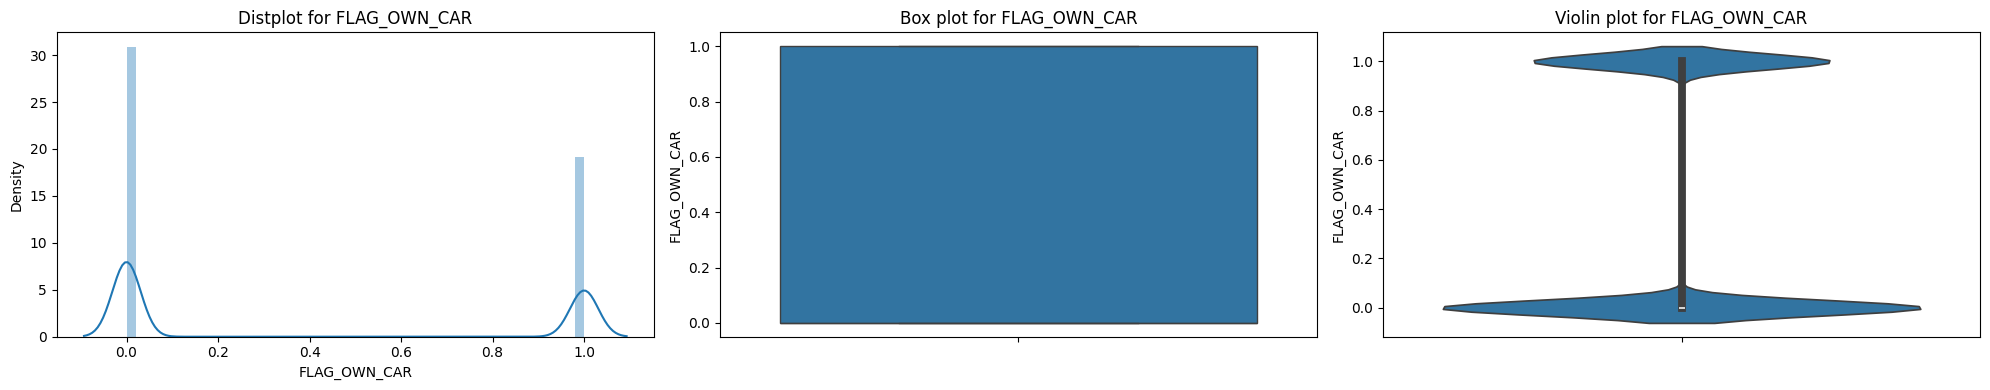

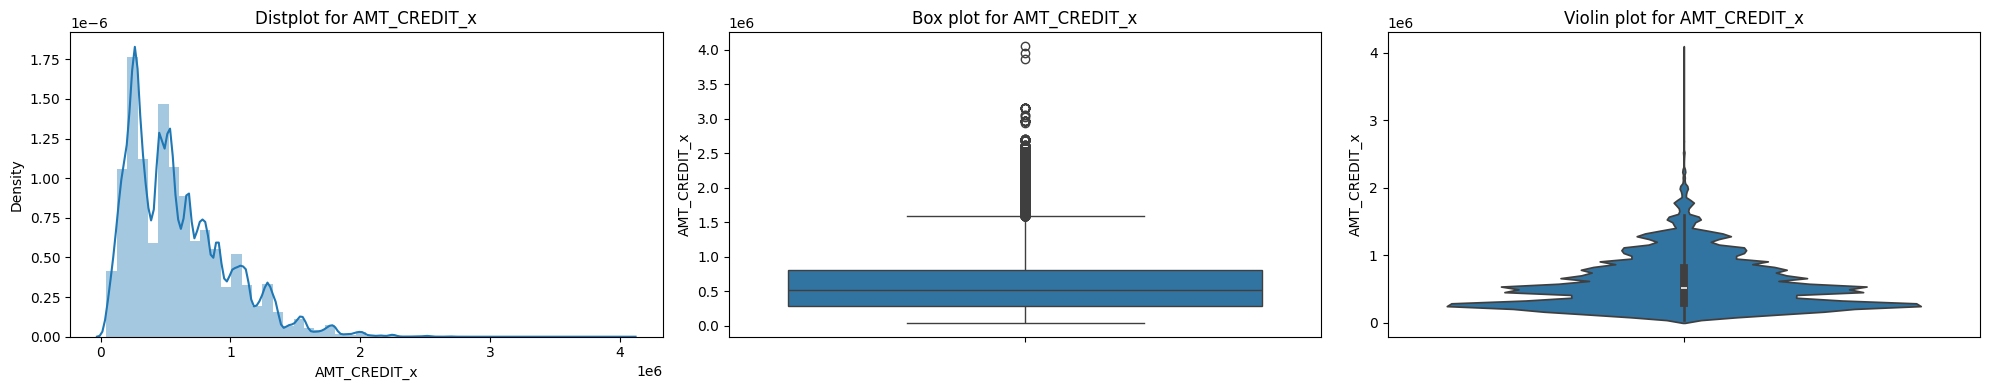

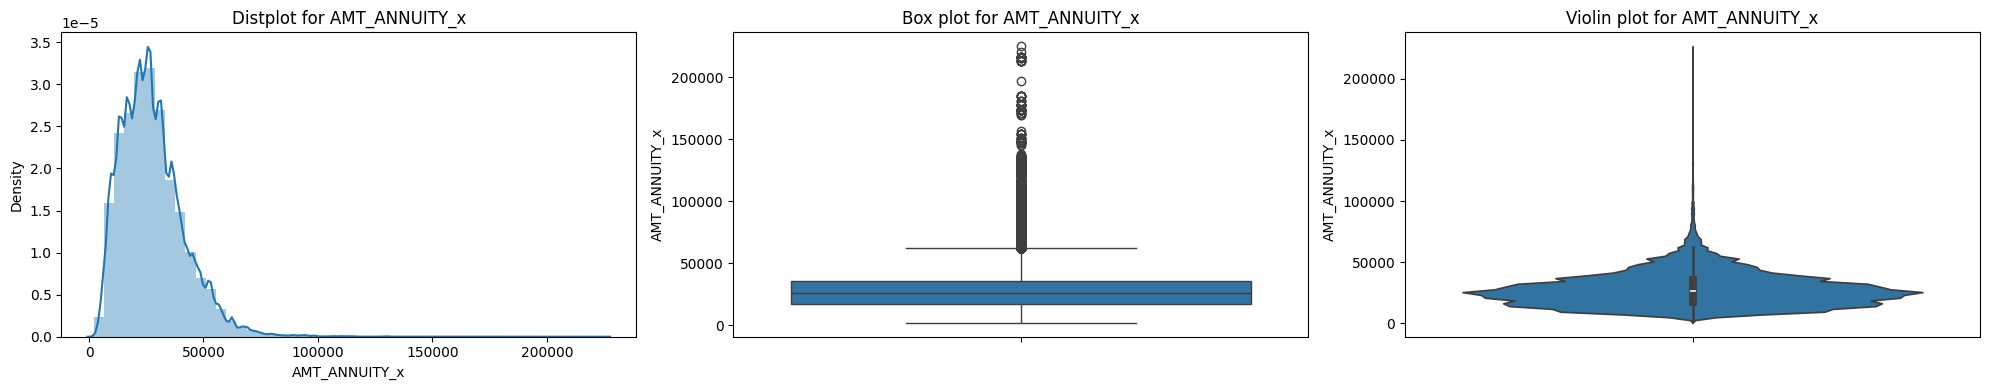

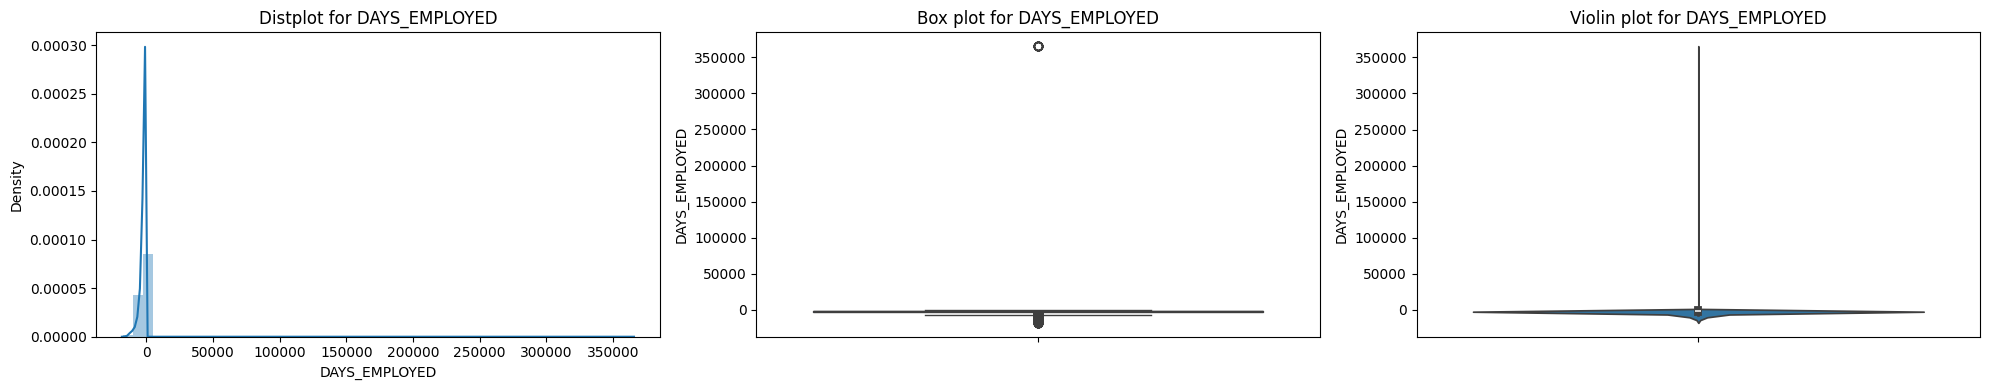

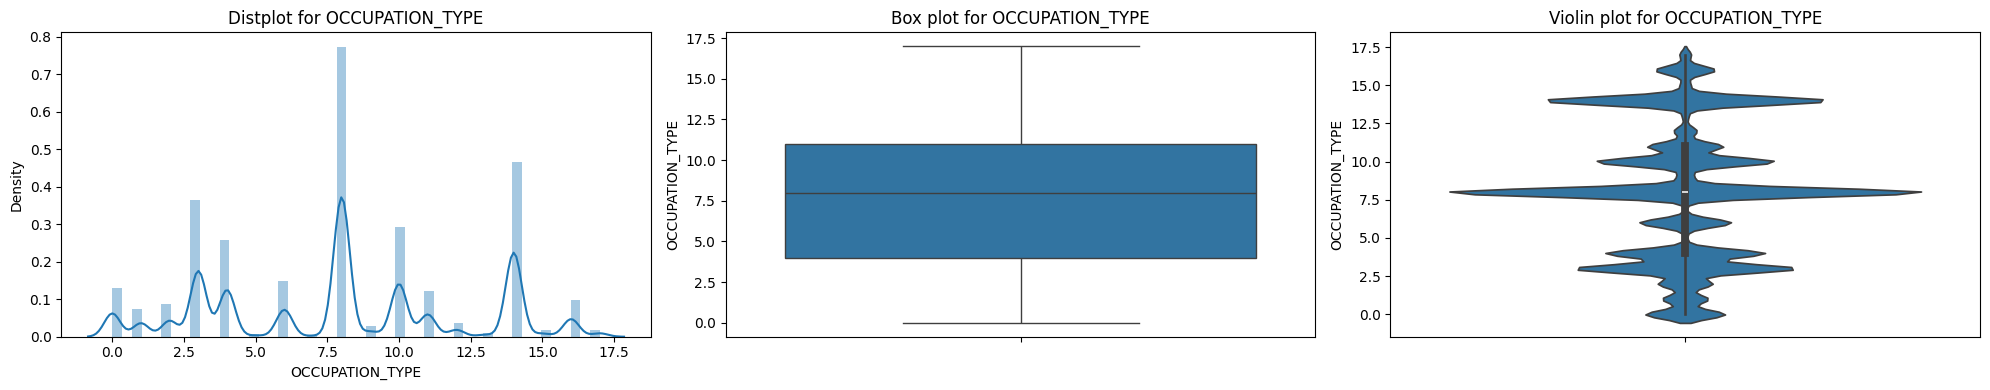

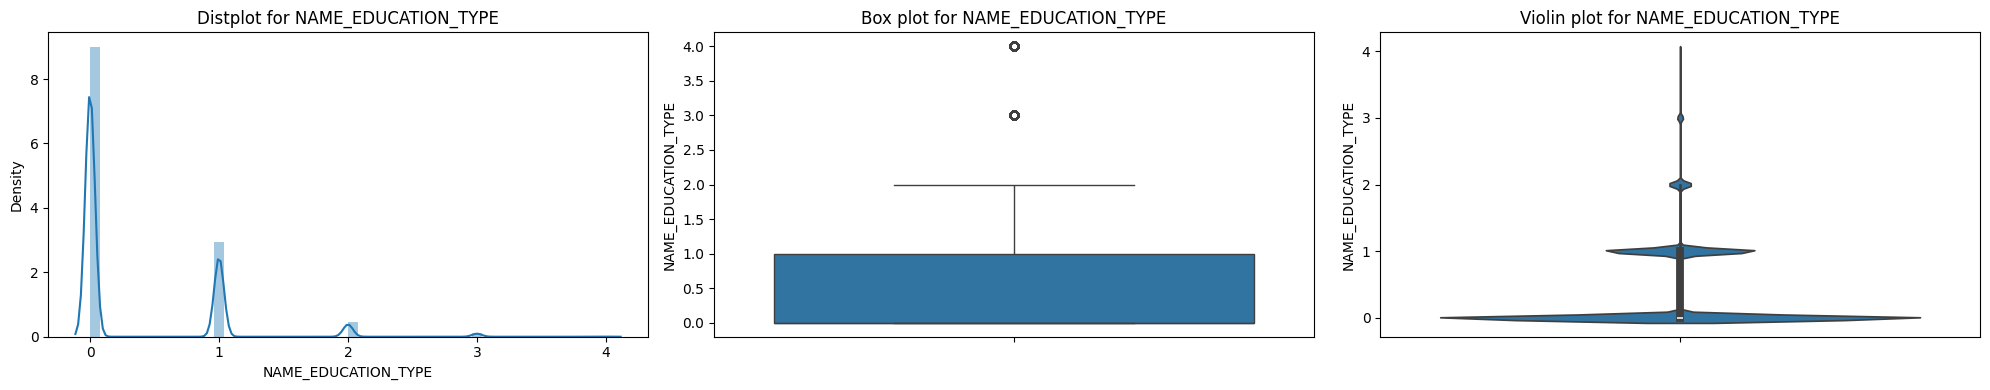

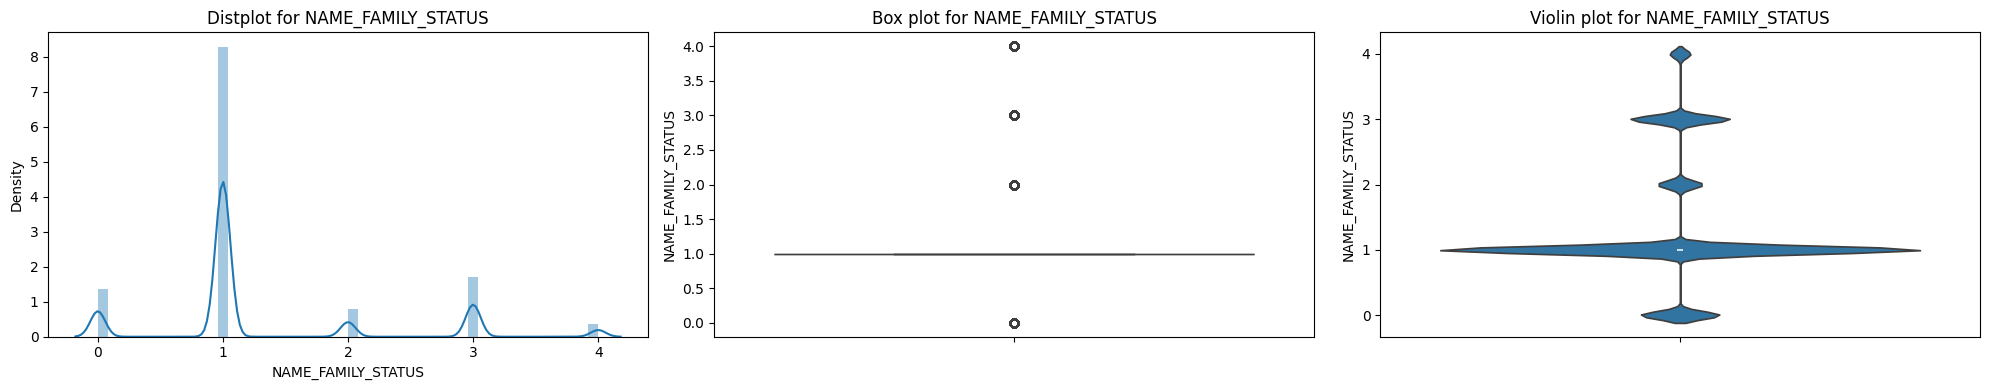

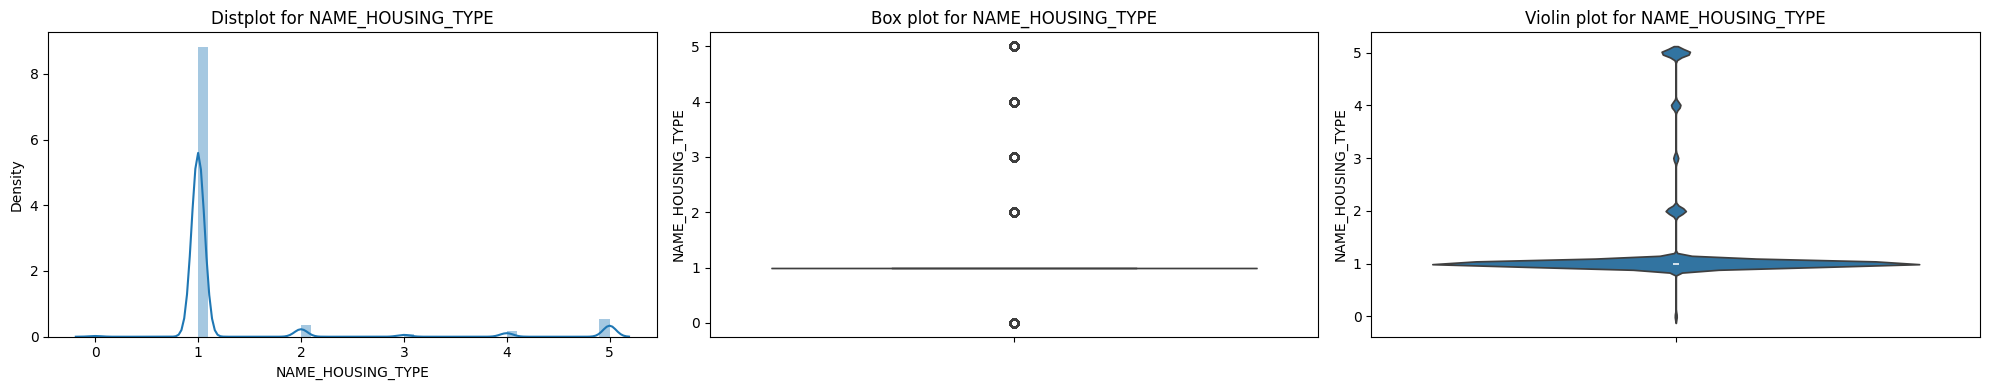

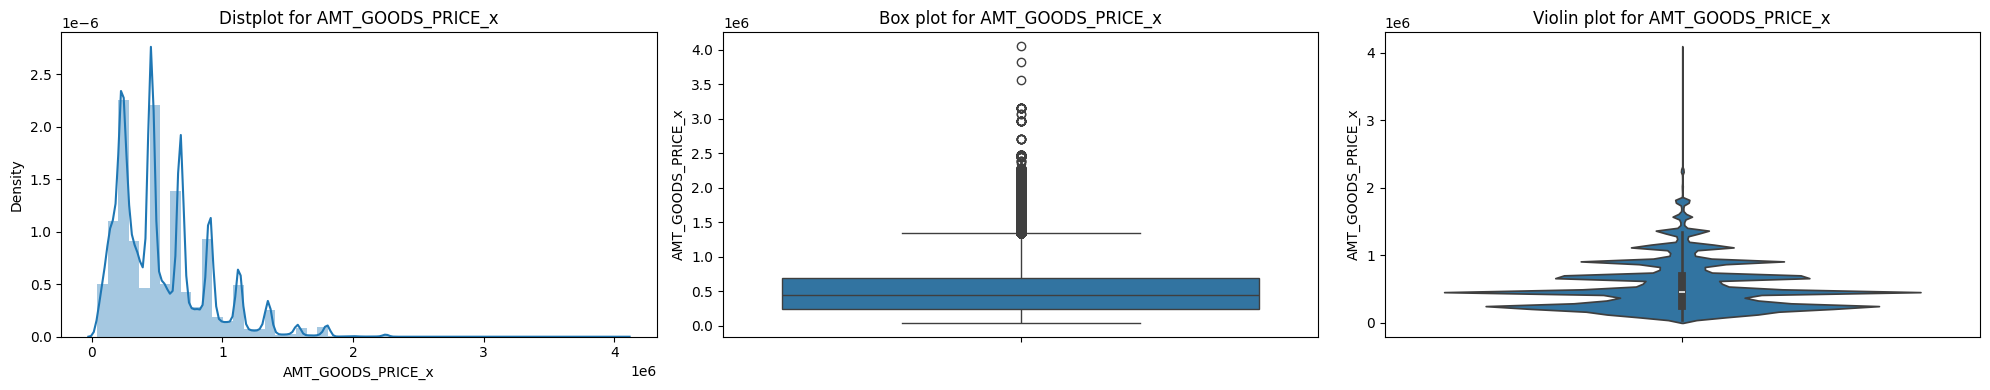

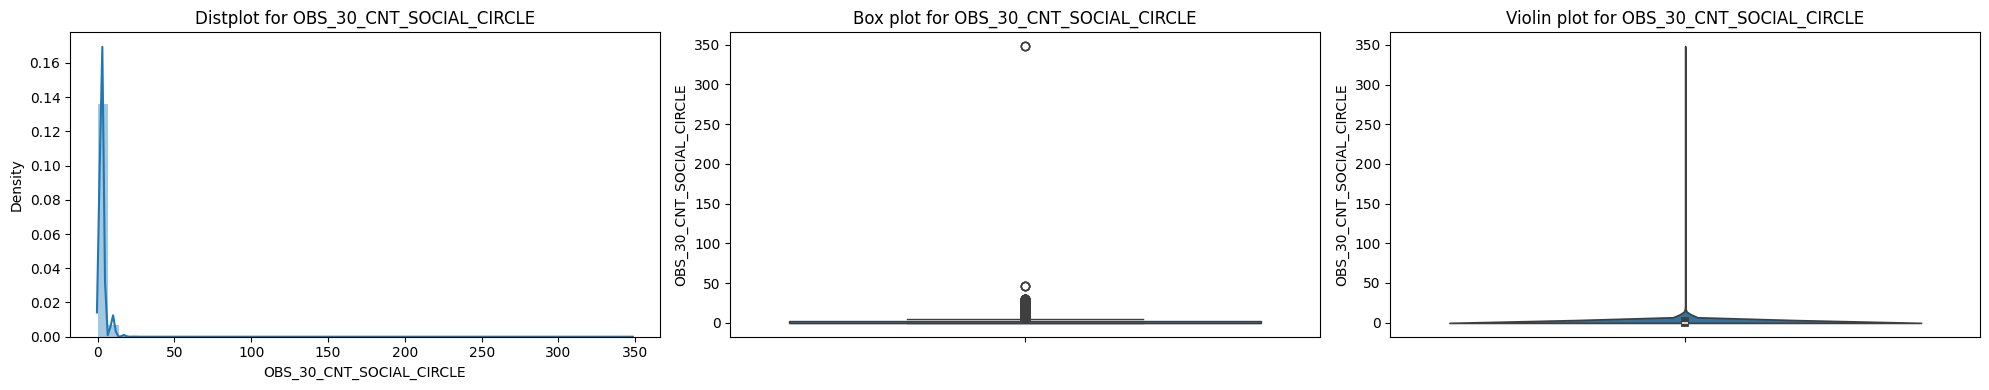

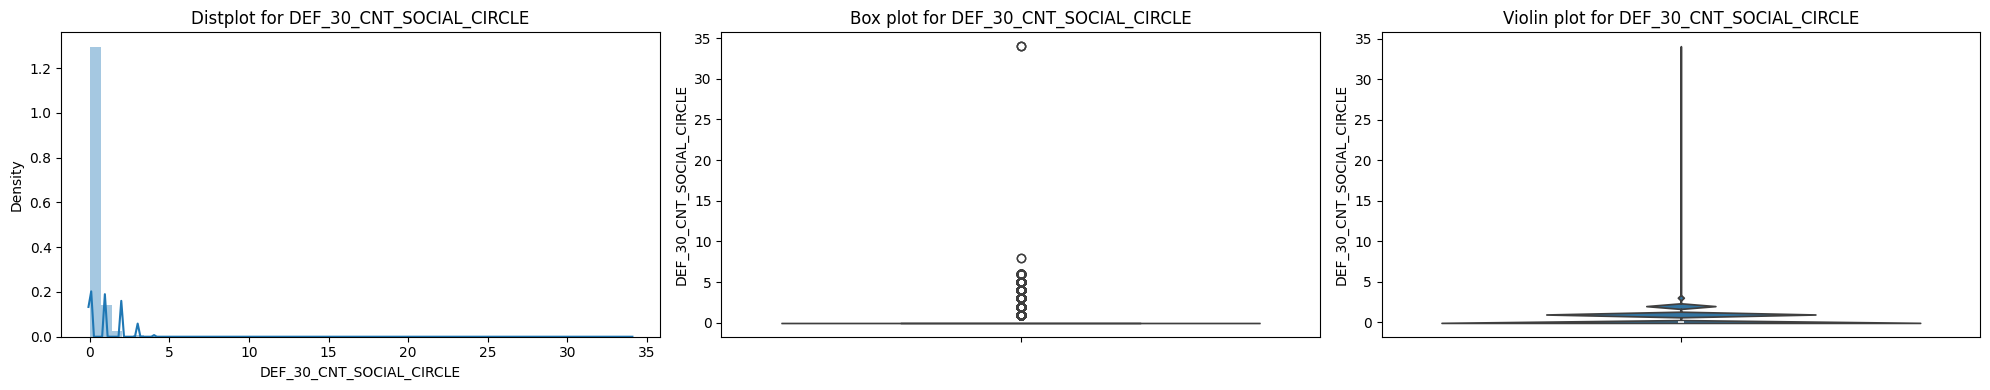

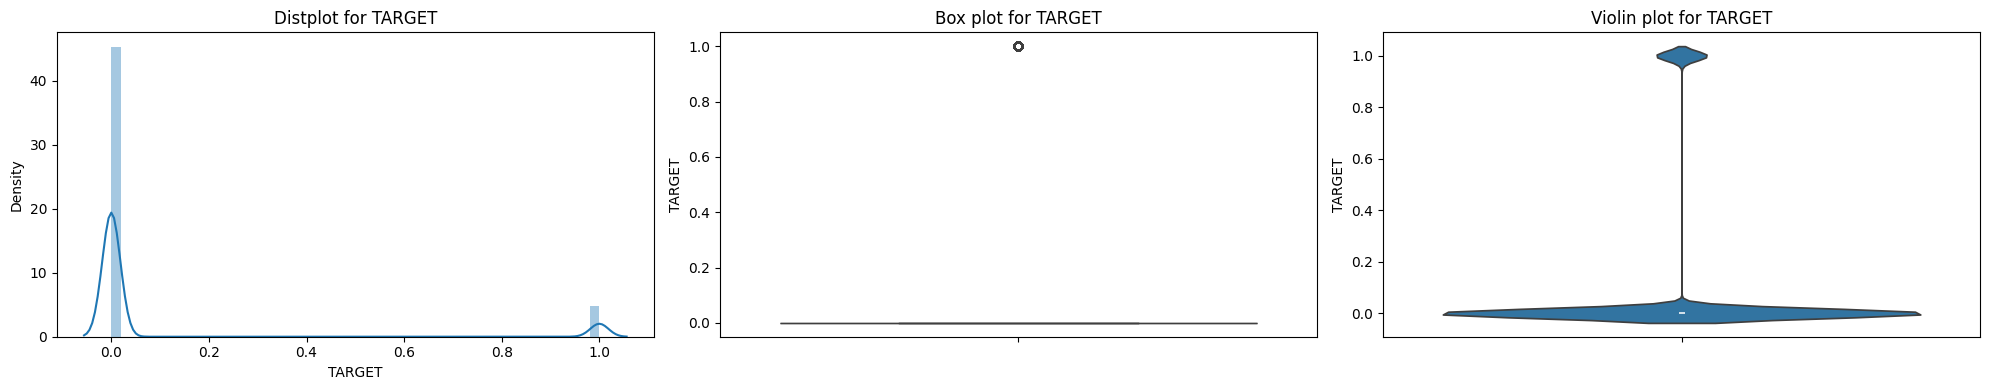

In [ ]:
skewed_columns=['AMT_INCOME_TOTAL','CODE_GENDER','FLAG_OWN_CAR','AMT_CREDIT_x', 'AMT_ANNUITY_x', 'DAYS_EMPLOYED',
    'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
    'AMT_GOODS_PRICE_x', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'TARGET']

for column in skewed_columns:
    skewplot(df2, column)

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,956121.0,0.094639,0.292715,0.000000,0.000000,0.00000,0.000000,1.000000e+00
CODE_GENDER,956121.0,0.376686,0.484618,0.000000,0.000000,0.00000,1.000000,2.000000e+00
DAYS_BIRTH,956121.0,-14961.033096,3612.126372,-25200.000000,-17667.000000,-14785.00000,-12011.000000,-7.489000e+03
FLAG_OWN_CAR,956121.0,0.382428,0.485980,0.000000,0.000000,0.00000,1.000000,1.000000e+00
FLAG_OWN_REALTY,956121.0,0.710028,0.453749,0.000000,0.000000,1.00000,1.000000,1.000000e+00
CNT_CHILDREN,956121.0,0.497461,0.765035,0.000000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,956121.0,179799.644959,228781.084935,25650.000000,112500.000000,157500.00000,225000.000000,1.170000e+08
AMT_CREDIT_x,956121.0,597602.809791,385007.685268,45000.000000,284256.000000,518562.00000,808650.000000,4.050000e+06
AMT_ANNUITY_x,956121.0,27755.516189,14009.263039,1980.000000,17509.500000,25960.50000,35523.000000,2.250000e+05
AMT_GOODS_PRICE_x,956121.0,536232.074909,353069.486183,40500.000000,247500.000000,450000.00000,684000.000000,4.050000e+06


In [ ]:
df3= df2.copy()
df3.columns

Index(['TARGET', 'CODE_GENDER', 'DAYS_BIRTH', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'EXT_SOURCE_3', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_CONTRACT_TYPE_x', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NAME_CONTRACT_STATUS'],
      dtype='object')

In [ ]:
import numpy as np

# Apply square root transformation to the specified columns

df3["AMT_INCOME_TOTAL_sqrt"] = np.sqrt(df3["AMT_INCOME_TOTAL"])
df3["AMT_CREDIT_x_sqrt"] = np.sqrt(df3["AMT_CREDIT_x"])
df3["AMT_ANNUITY_x_sqrt"] = np.sqrt(df3["AMT_ANNUITY_x"])
df3["CODE_GENDER_sqrt"] = np.sqrt(df3["CODE_GENDER"])
df3["FLAG_OWN_CAR_sqrt"] = np.sqrt(df3["FLAG_OWN_CAR"])

df3["DAYS_EMPLOYED_sqrt"] = np.sqrt(df3["DAYS_EMPLOYED"])
df3["OCCUPATION_TYPE_sqrt"] = np.sqrt(df3["OCCUPATION_TYPE"])
df3["NAME_EDUCATION_TYPE_sqrt"] = np.sqrt(df3["NAME_EDUCATION_TYPE"])
df3["NAME_HOUSING_TYPE_sqrt"] = np.sqrt(df3["NAME_HOUSING_TYPE"])


df3["NAME_FAMILY_STATUS_sqrt"] = np.sqrt(df3["NAME_FAMILY_STATUS"])
df3["AMT_GOODS_PRICE_x_sqrt"] = np.sqrt(df3["AMT_GOODS_PRICE_x"])
df3["OBS_30_CNT_SOCIAL_CIRCLE_sqrt"] = np.sqrt(df3["OBS_30_CNT_SOCIAL_CIRCLE"])
df3["DEF_30_CNT_SOCIAL_CIRCLE_sqrt"] = np.sqrt(df3["DEF_30_CNT_SOCIAL_CIRCLE"])

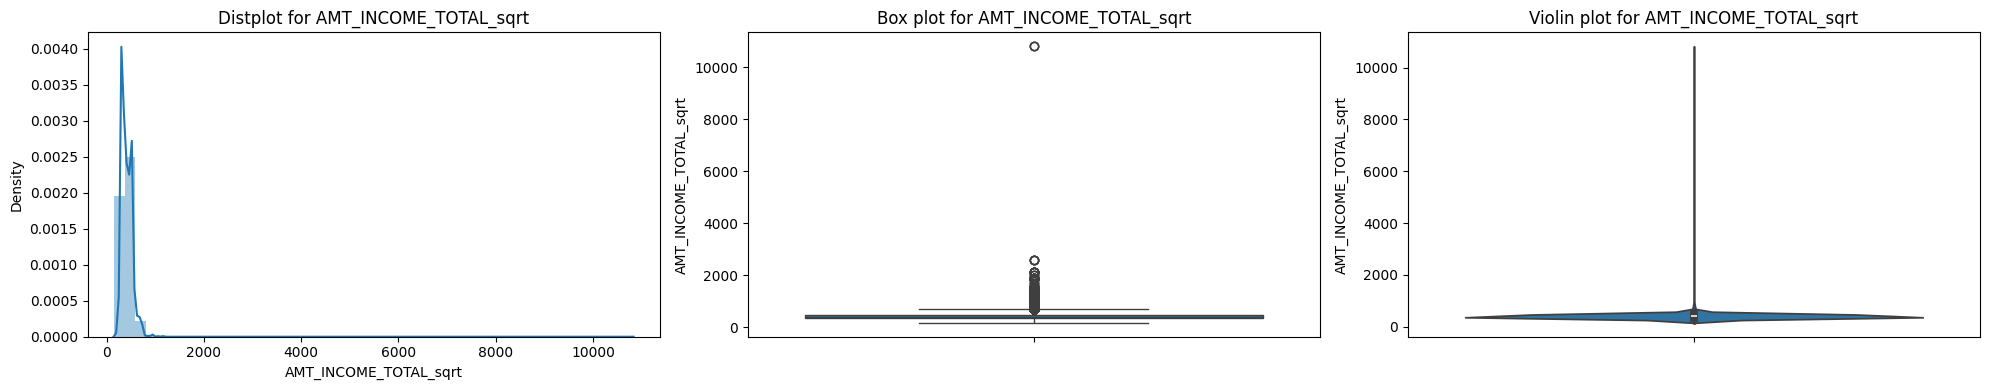

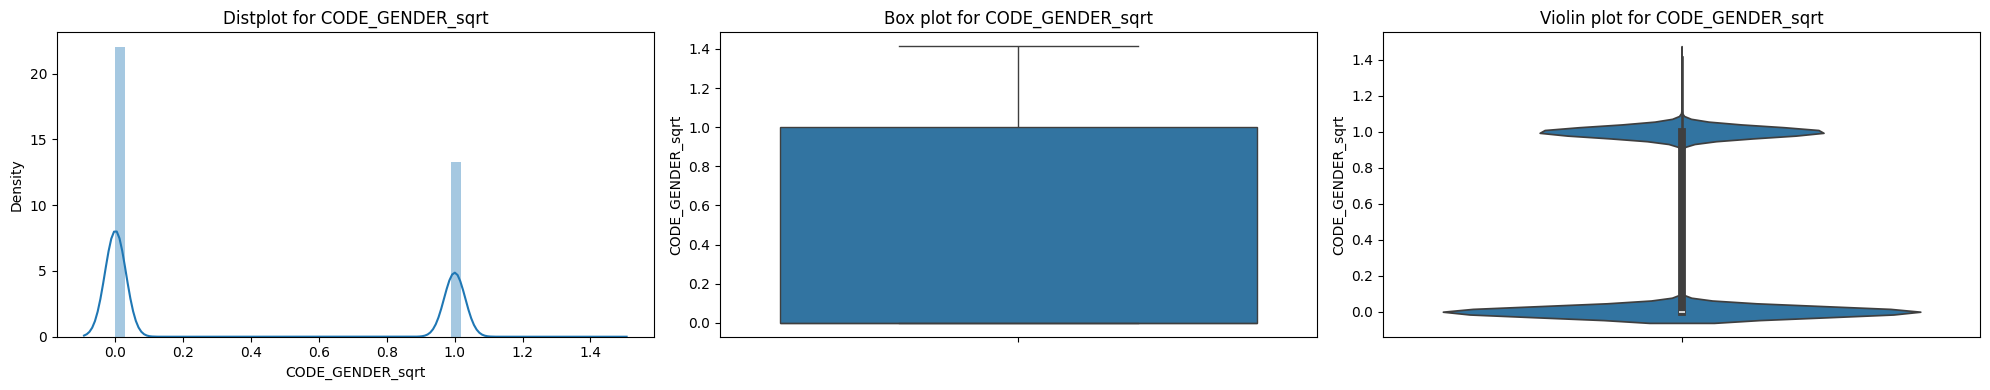

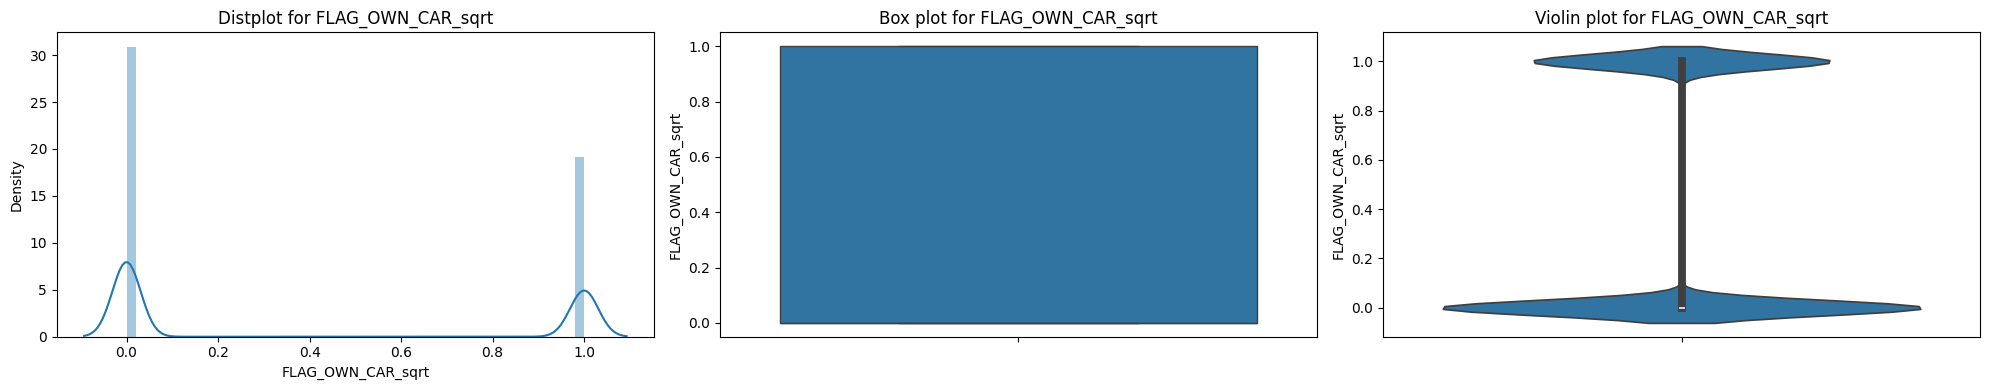

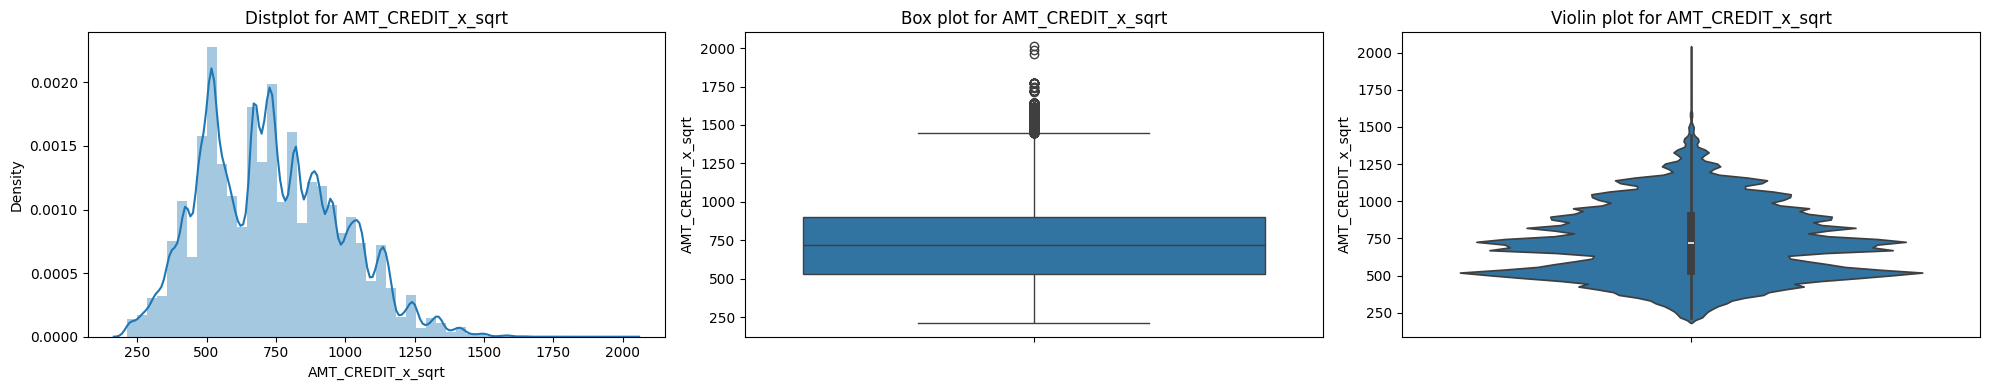

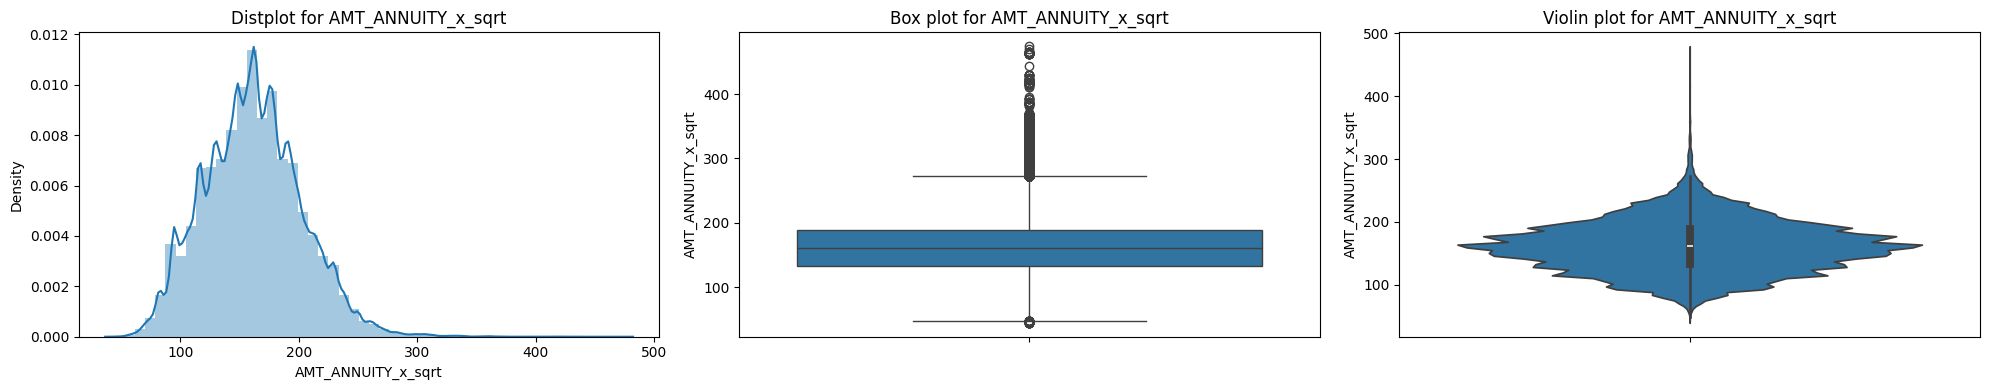

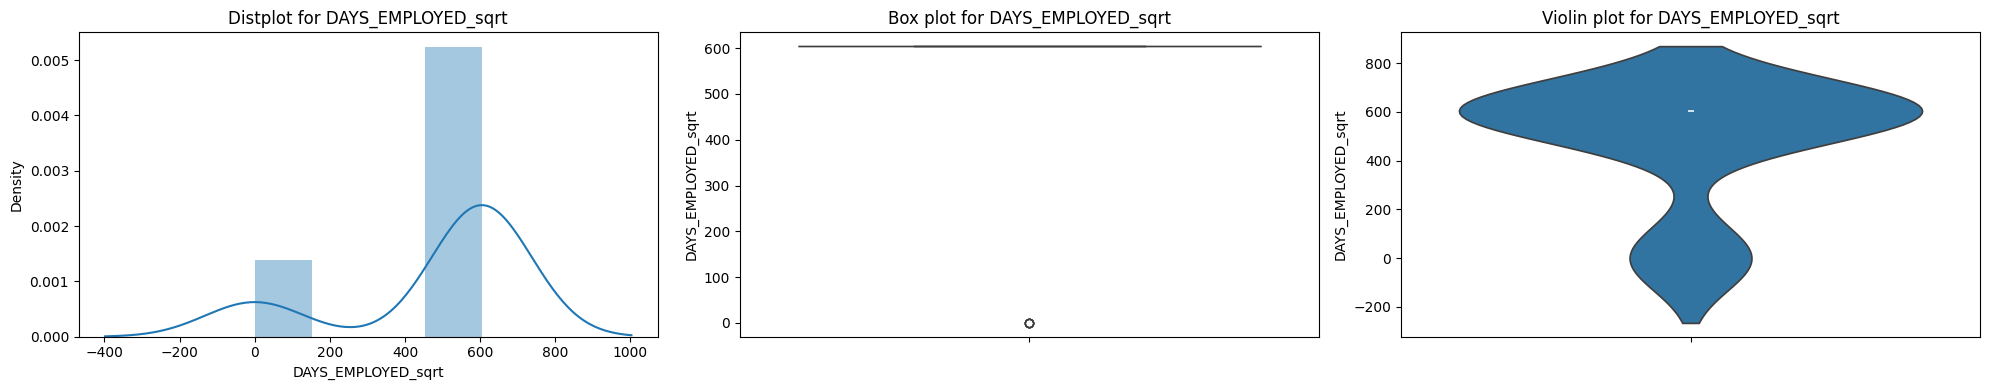

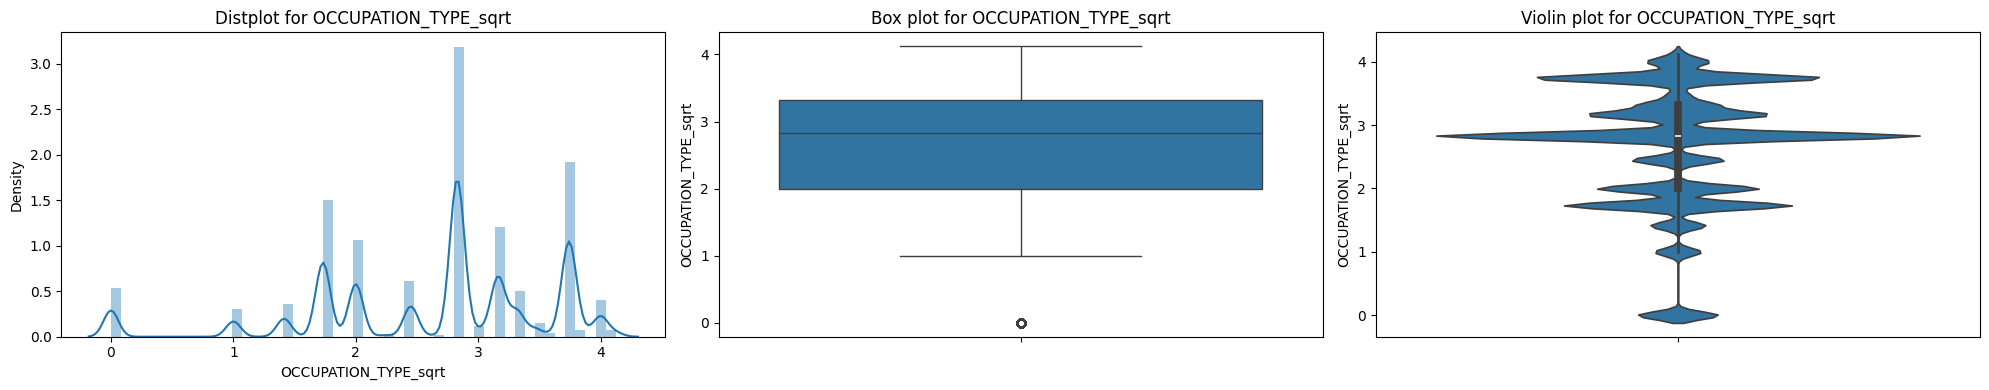

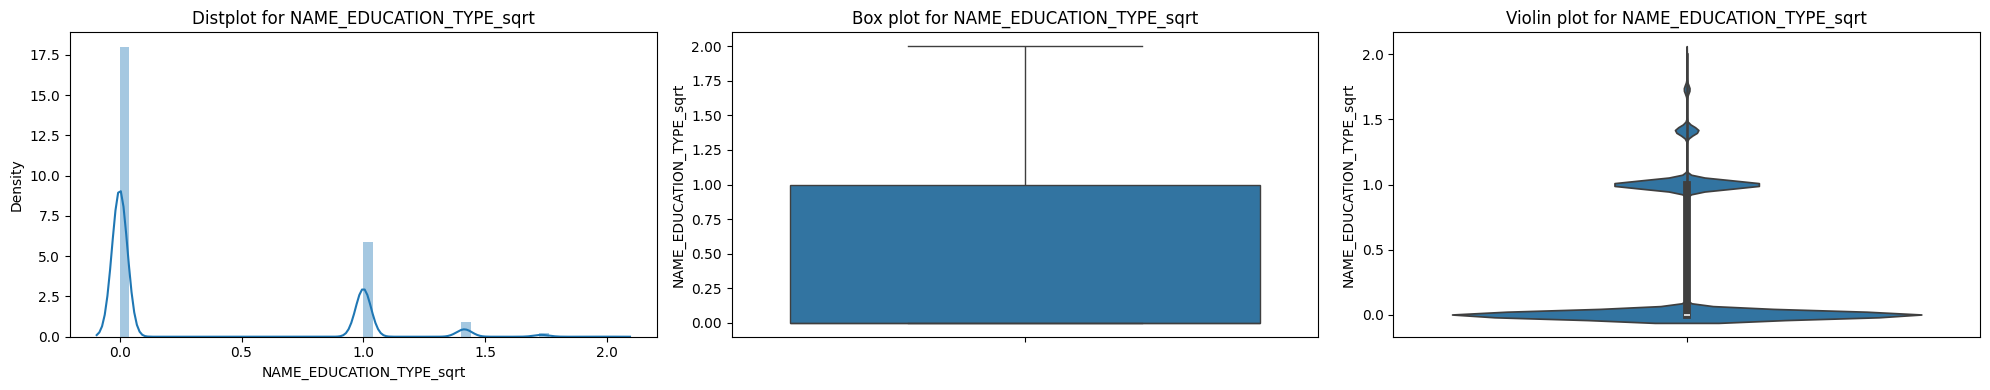

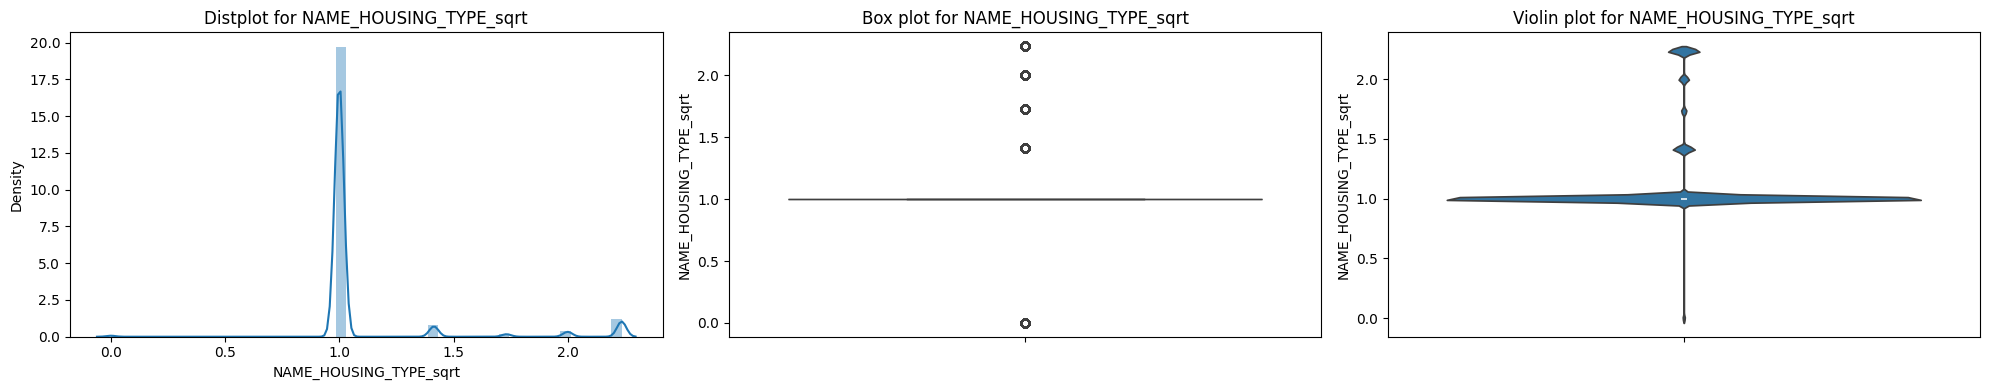

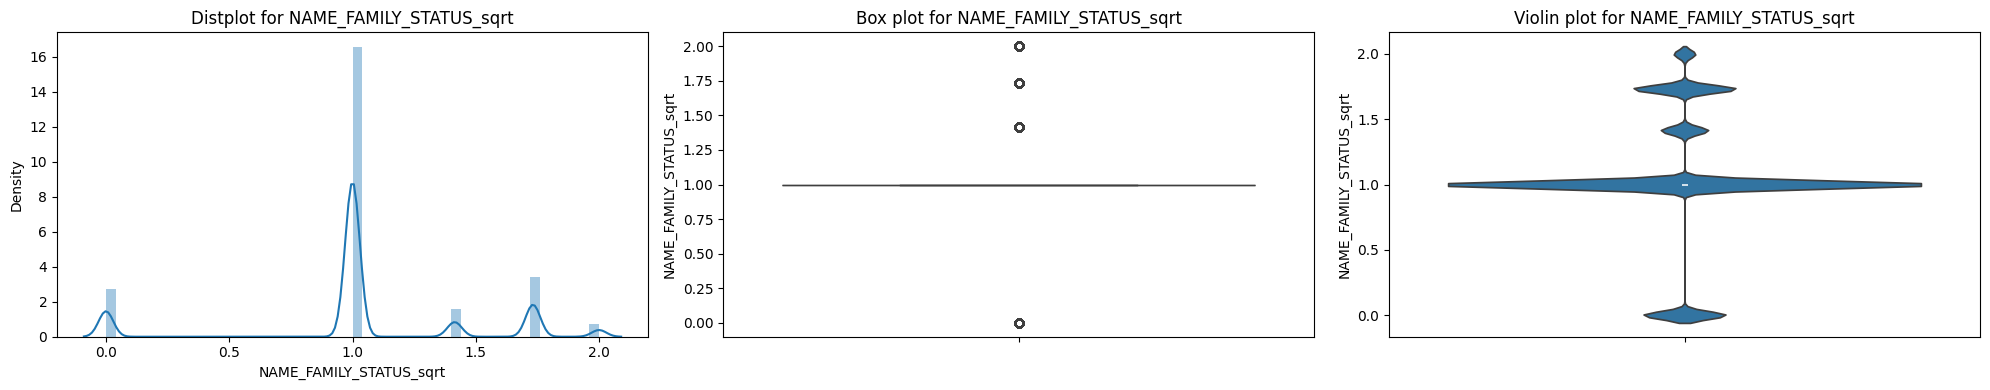

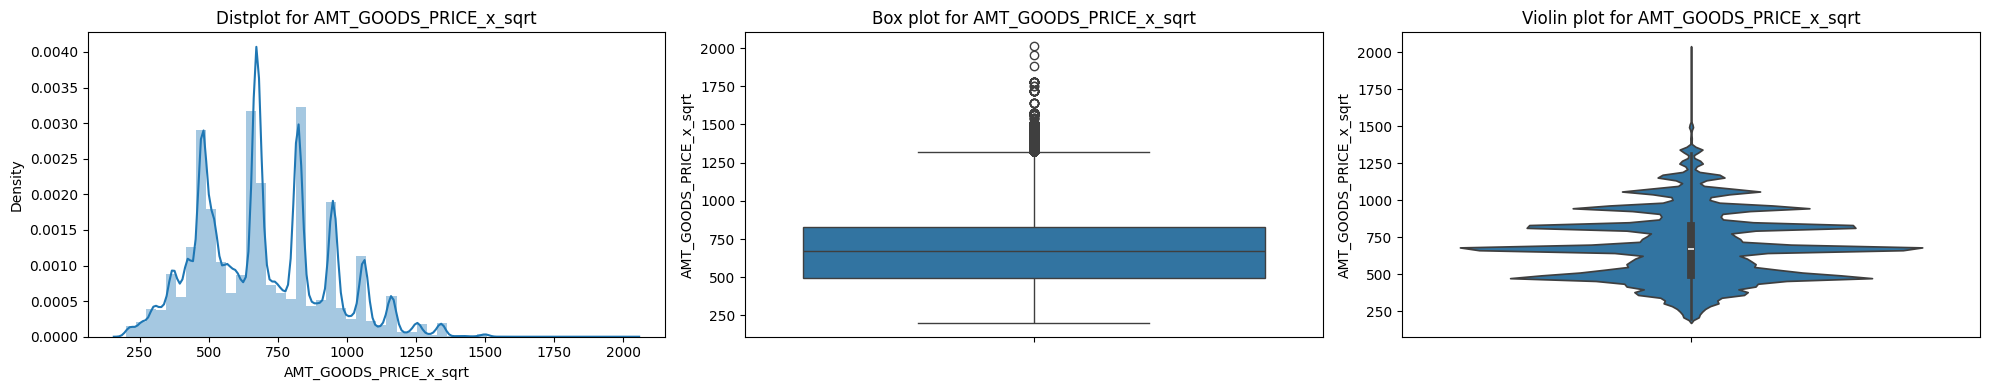

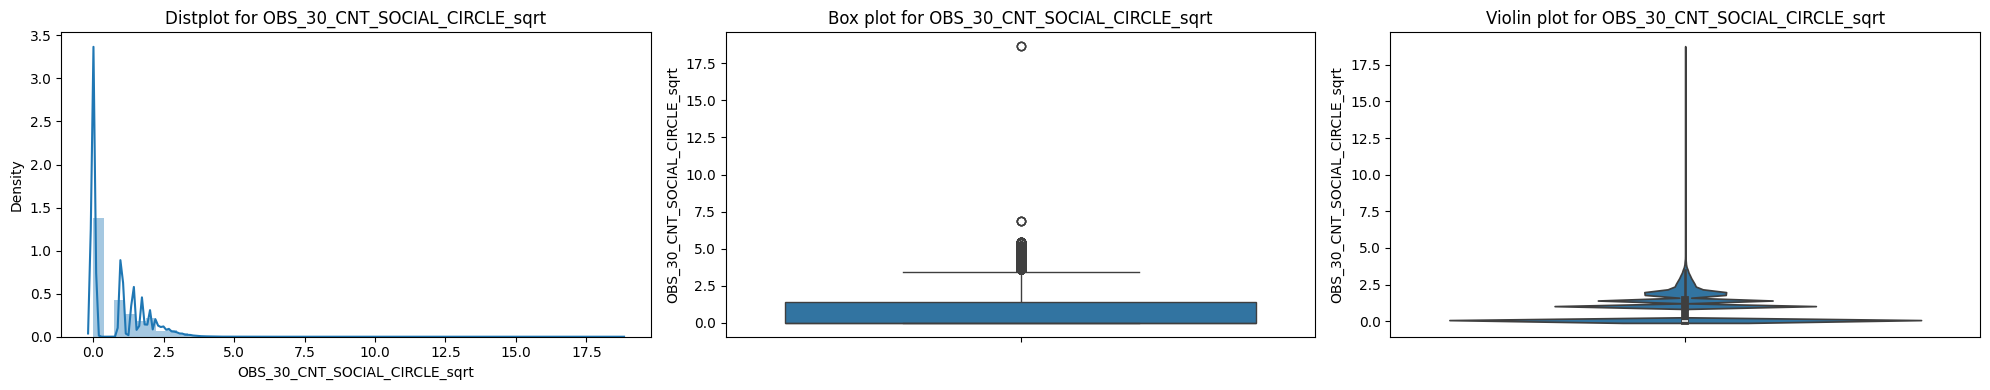

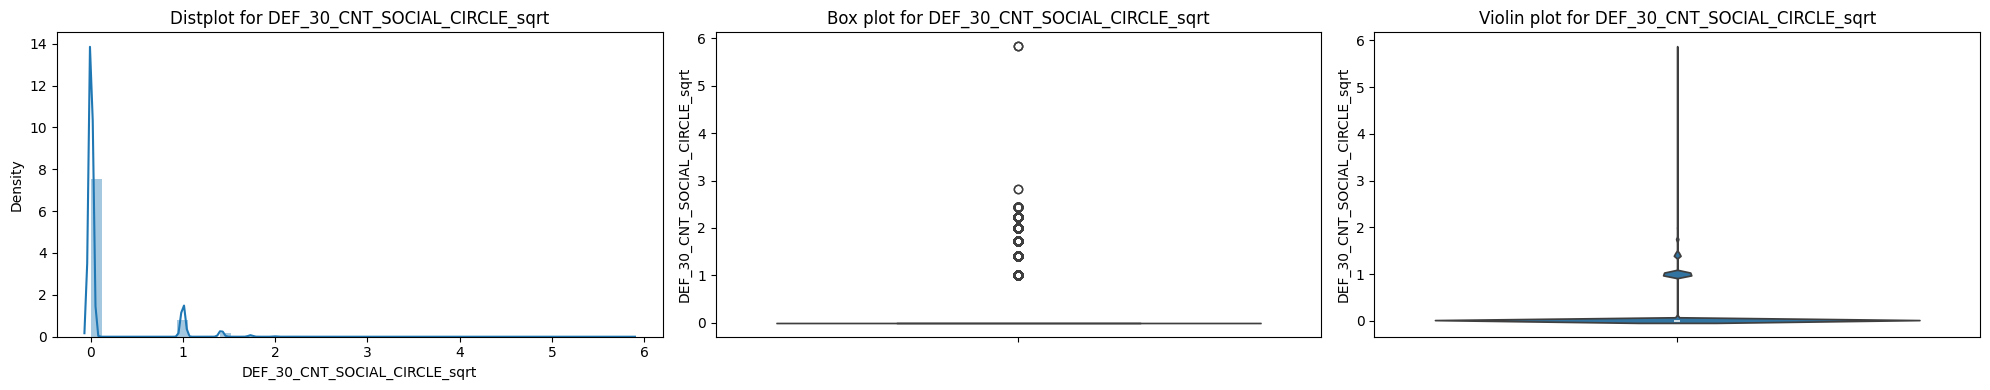

In [ ]:
skwed_columns_2=["AMT_INCOME_TOTAL_sqrt","CODE_GENDER_sqrt","FLAG_OWN_CAR_sqrt","AMT_CREDIT_x_sqrt","AMT_ANNUITY_x_sqrt","DAYS_EMPLOYED_sqrt","OCCUPATION_TYPE_sqrt","NAME_EDUCATION_TYPE_sqrt","NAME_HOUSING_TYPE_sqrt","NAME_FAMILY_STATUS_sqrt","AMT_GOODS_PRICE_x_sqrt","OBS_30_CNT_SOCIAL_CIRCLE_sqrt","DEF_30_CNT_SOCIAL_CIRCLE_sqrt"]
for i in skwed_columns_2:
  skewplot(df3,i)

In [ ]:
df3.shape

(956121, 51)

In [ ]:
# Outliers Handling - Interquartile Range(IQR) Method
df4= df3.copy()
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [ ]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,956121.0,0.094639,0.292715,0.000000,0.000000,0.000000,0.000000,1.000000e+00
CODE_GENDER,956121.0,0.376686,0.484618,0.000000,0.000000,0.000000,1.000000,2.000000e+00
DAYS_BIRTH,956121.0,-14961.033096,3612.126372,-25200.000000,-17667.000000,-14785.000000,-12011.000000,-7.489000e+03
FLAG_OWN_CAR,956121.0,0.382428,0.485980,0.000000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_REALTY,956121.0,0.710028,0.453749,0.000000,0.000000,1.000000,1.000000,1.000000e+00
CNT_CHILDREN,956121.0,0.497461,0.765035,0.000000,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,956121.0,179799.644959,228781.084935,25650.000000,112500.000000,157500.000000,225000.000000,1.170000e+08
AMT_CREDIT_x,956121.0,597602.809791,385007.685268,45000.000000,284256.000000,518562.000000,808650.000000,4.050000e+06
AMT_ANNUITY_x,956121.0,27755.516189,14009.263039,1980.000000,17509.500000,25960.500000,35523.000000,2.250000e+05
AMT_GOODS_PRICE_x,956121.0,536232.074909,353069.486183,40500.000000,247500.000000,450000.000000,684000.000000,4.050000e+06


In [ ]:
df4["DEF_30_CNT_SOCIAL_CIRCLE"].min()



0.0

In [ ]:
df4["DEF_30_CNT_SOCIAL_CIRCLE"].max()

34.0

In [ ]:
df4['AMT_INCOME_TOTAL_sqrt'].max()

10816.653826391968

In [ ]:
df4['DAYS_REGISTRATION'].max()

0.0

In [ ]:
outlier_columns = ['AMT_INCOME_TOTAL_sqrt','CODE_GENDER_sqrt','FLAG_OWN_CAR_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt', 'DAYS_EMPLOYED_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt','NAME_HOUSING_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt', 'AMT_GOODS_PRICE_x_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt']
for i in outlier_columns:
  outlier(df4,i)

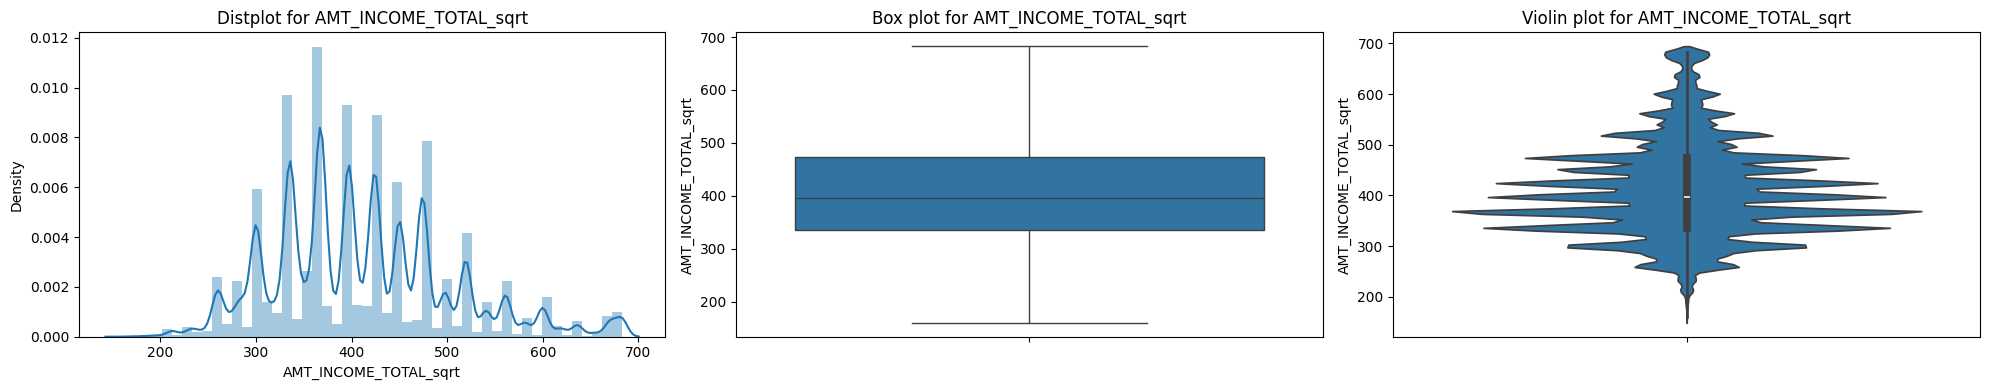

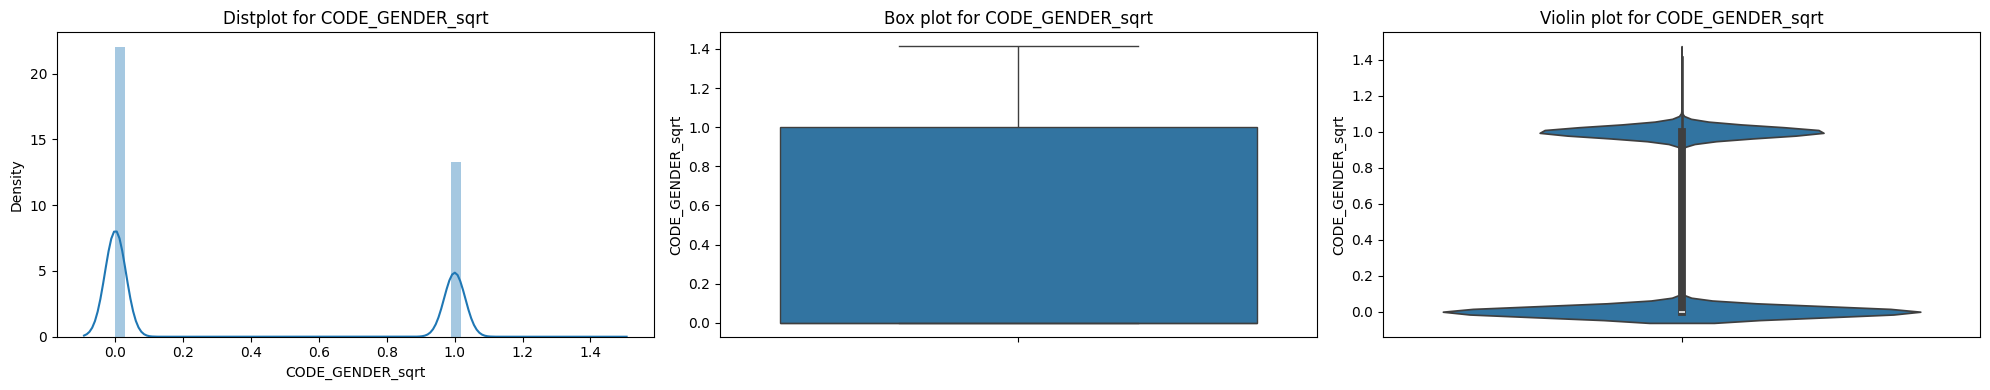

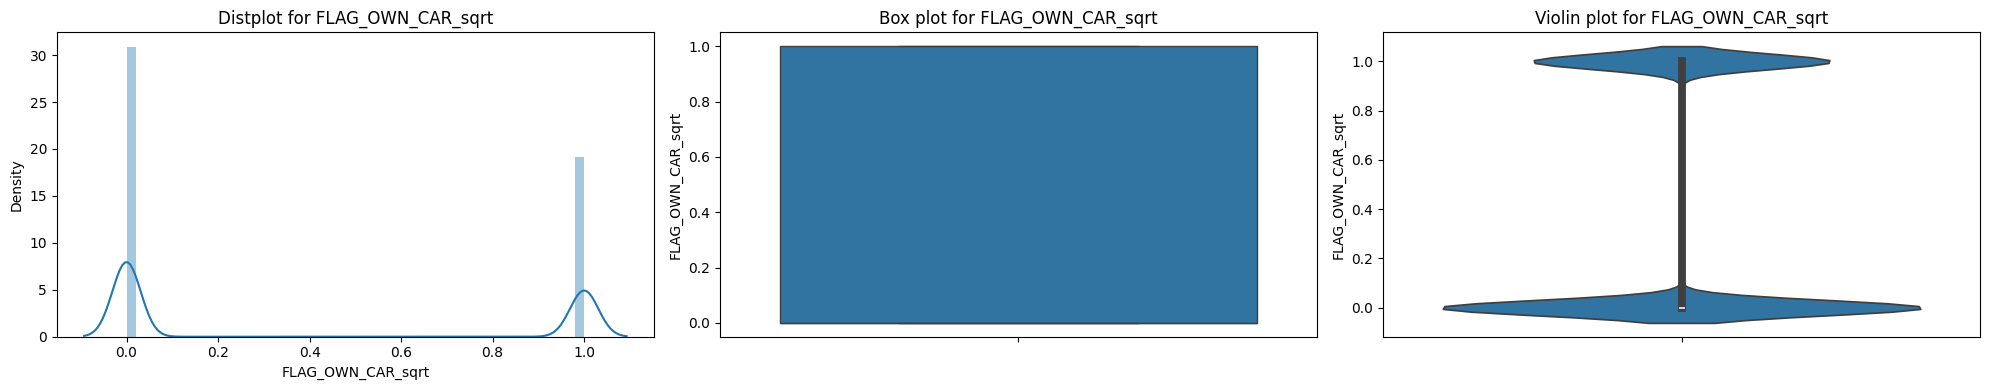

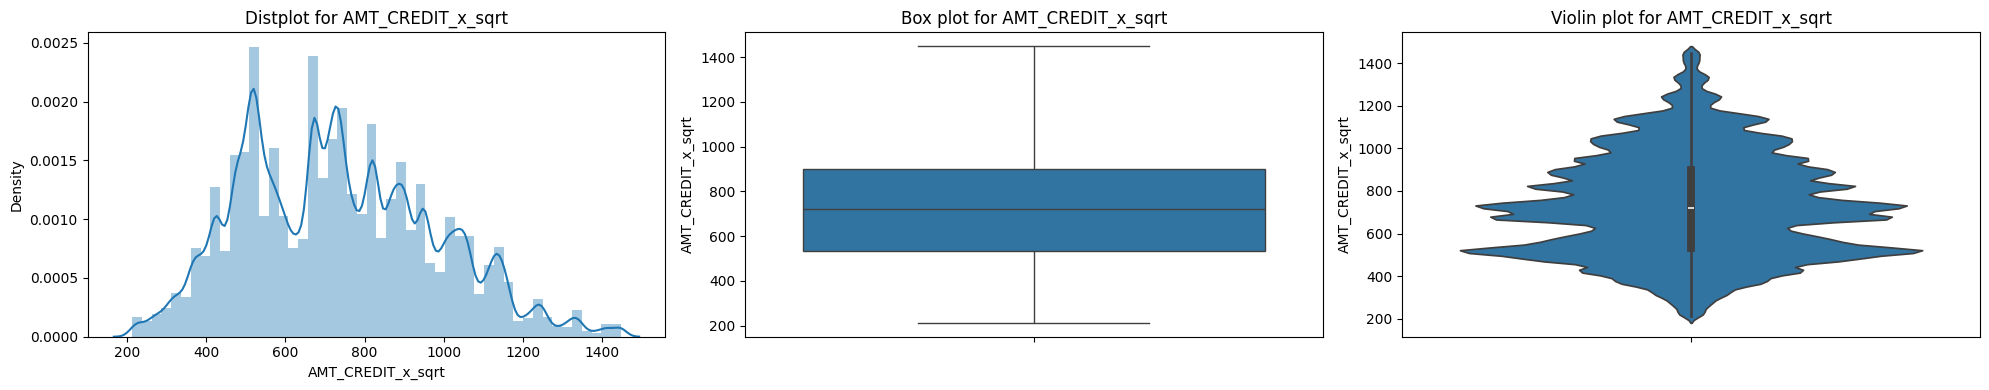

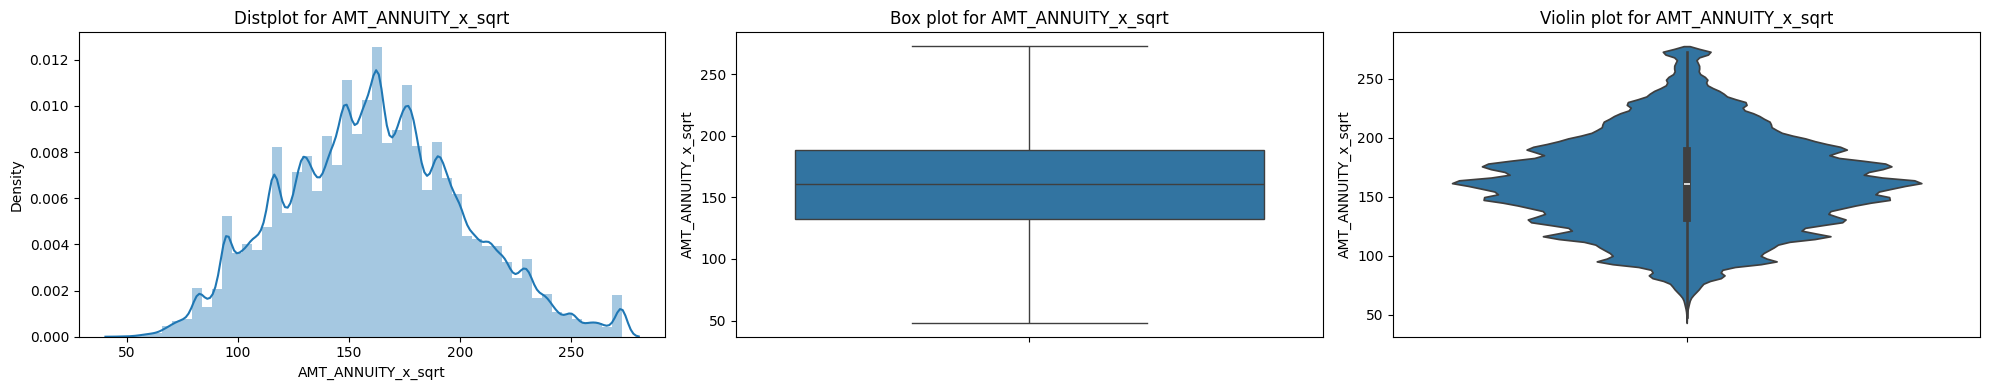

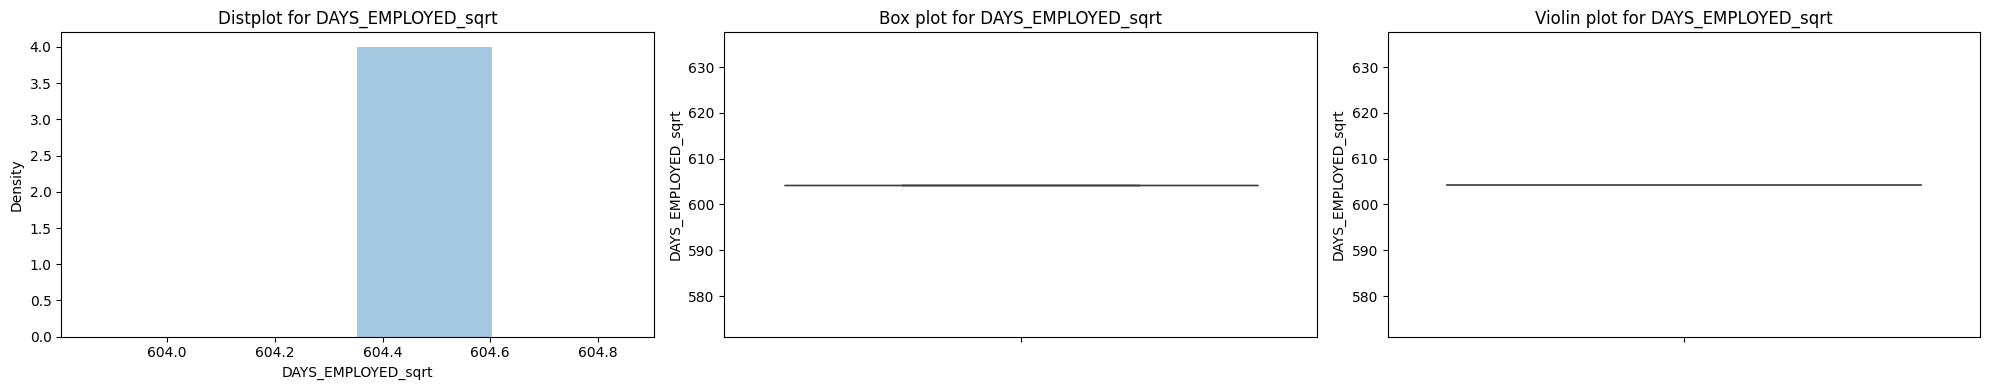

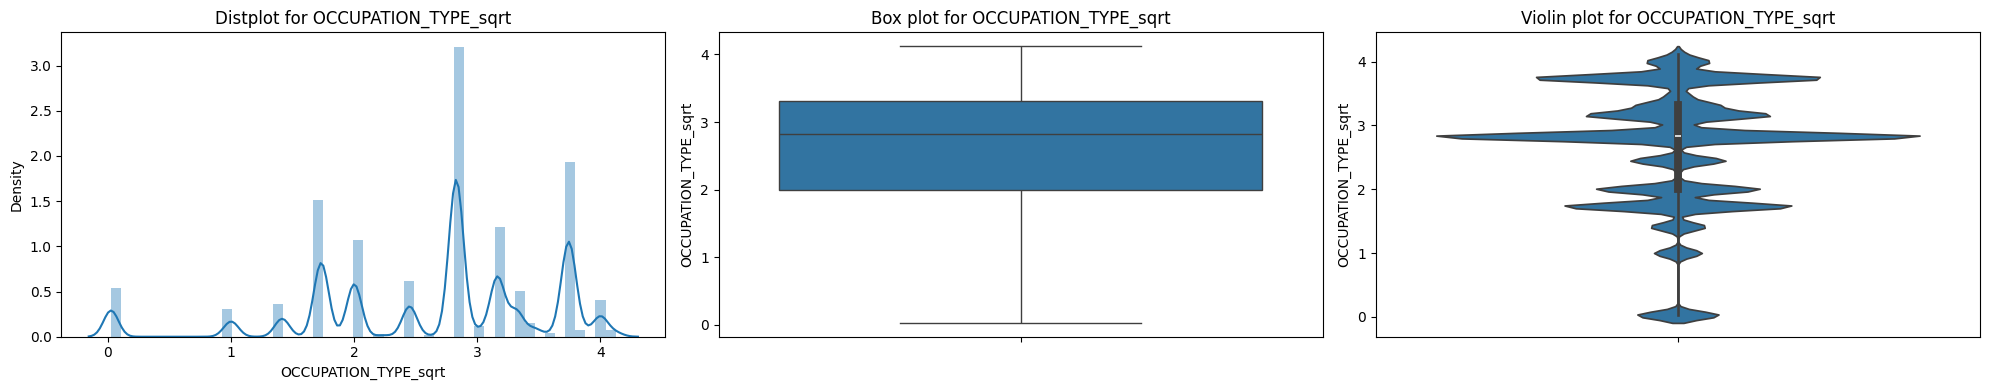

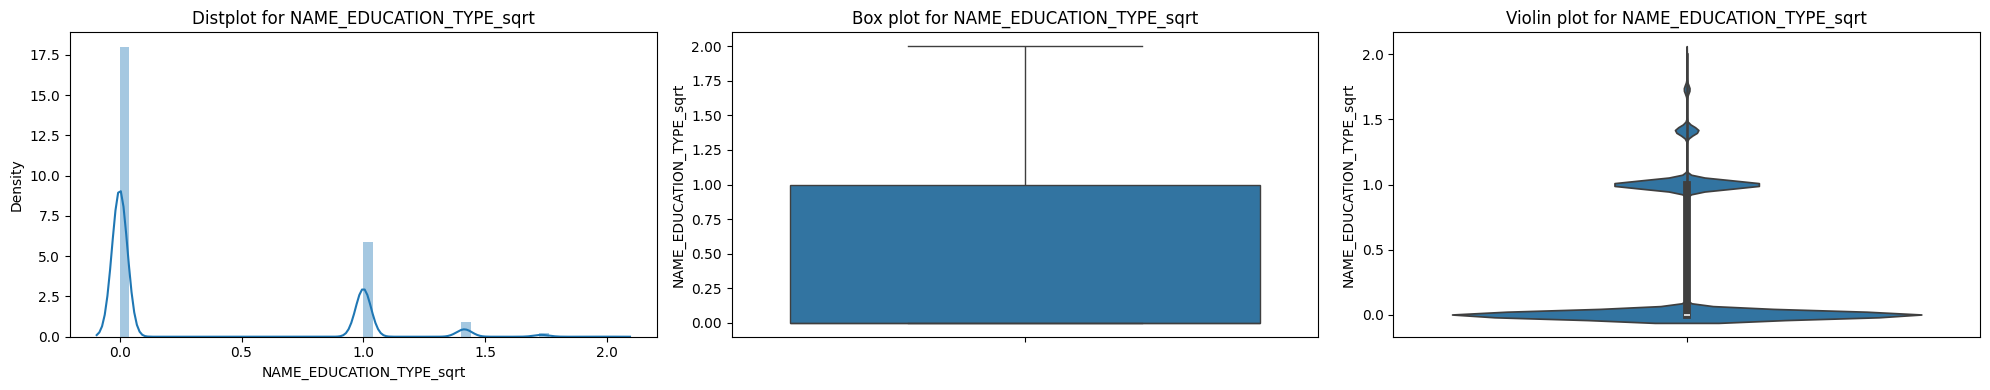

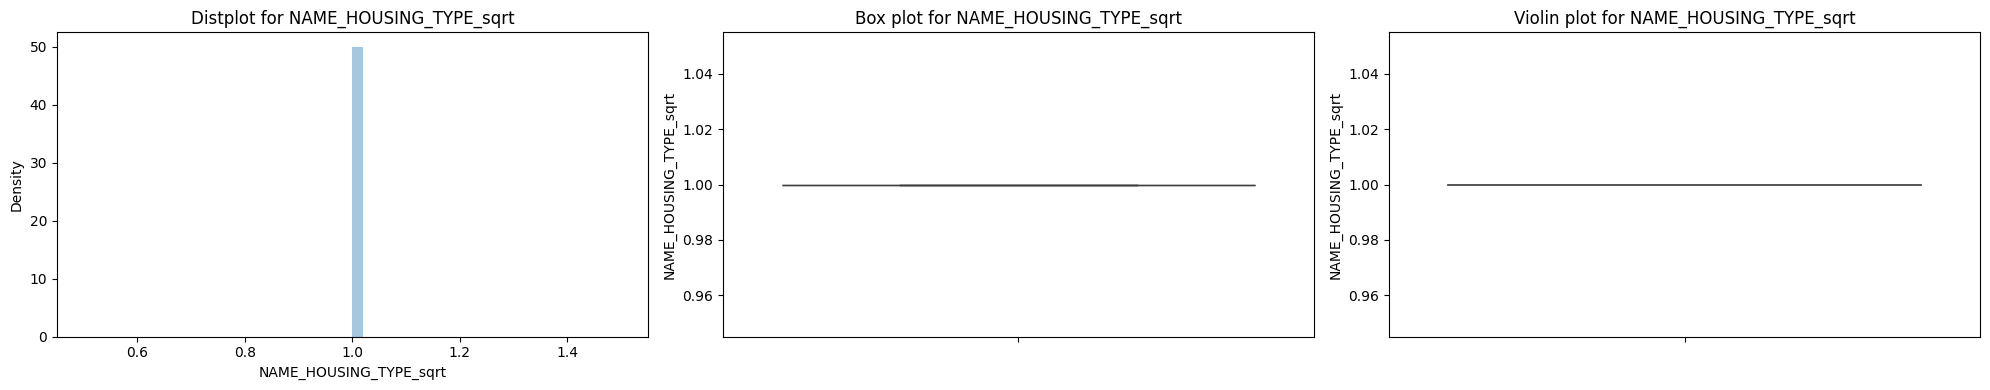

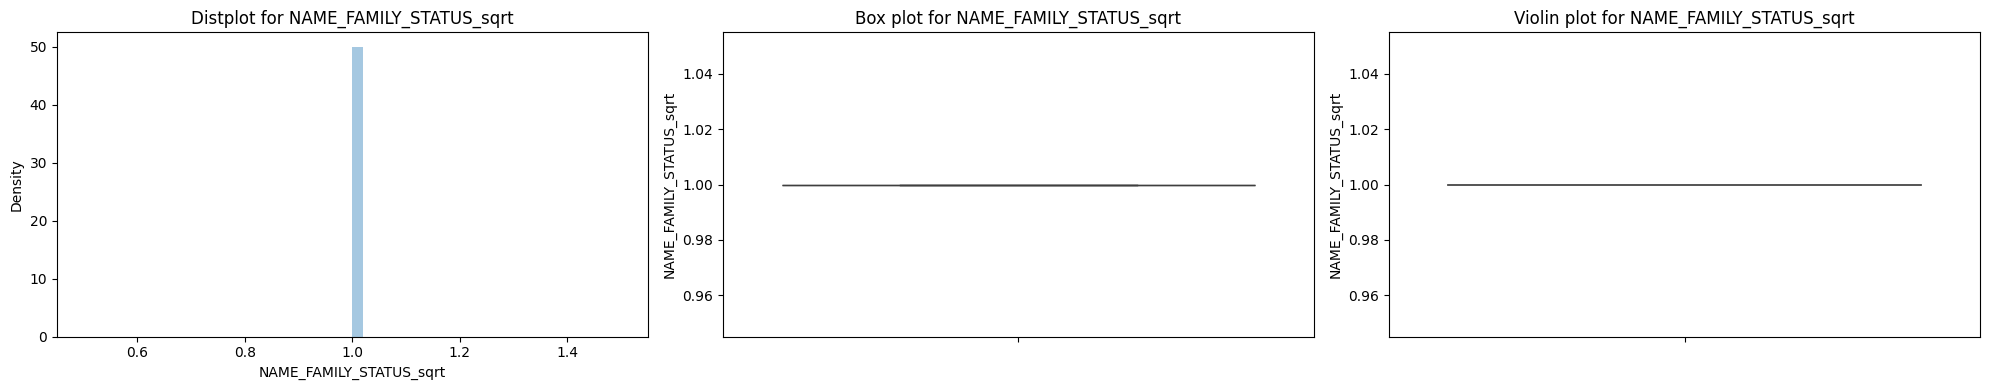

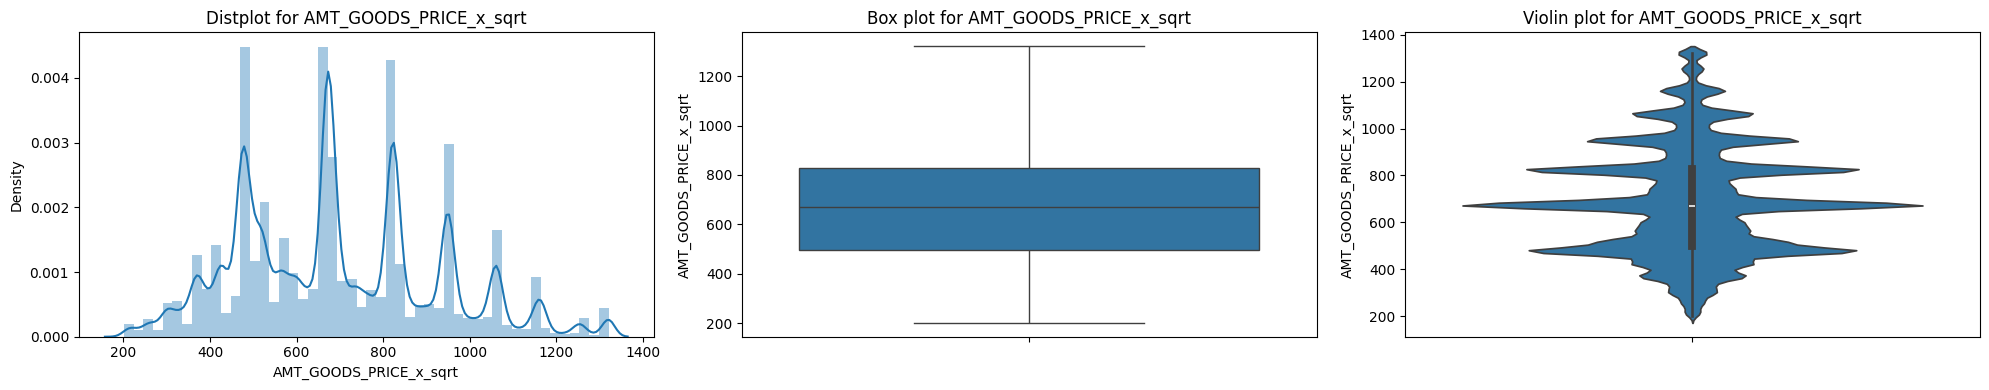

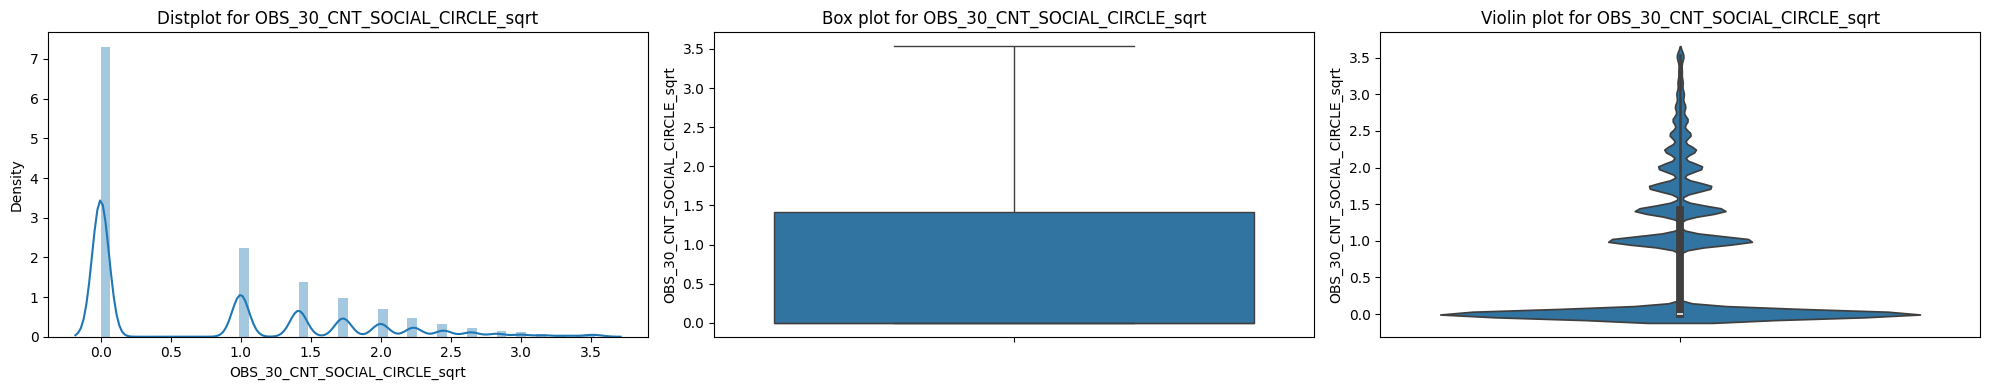

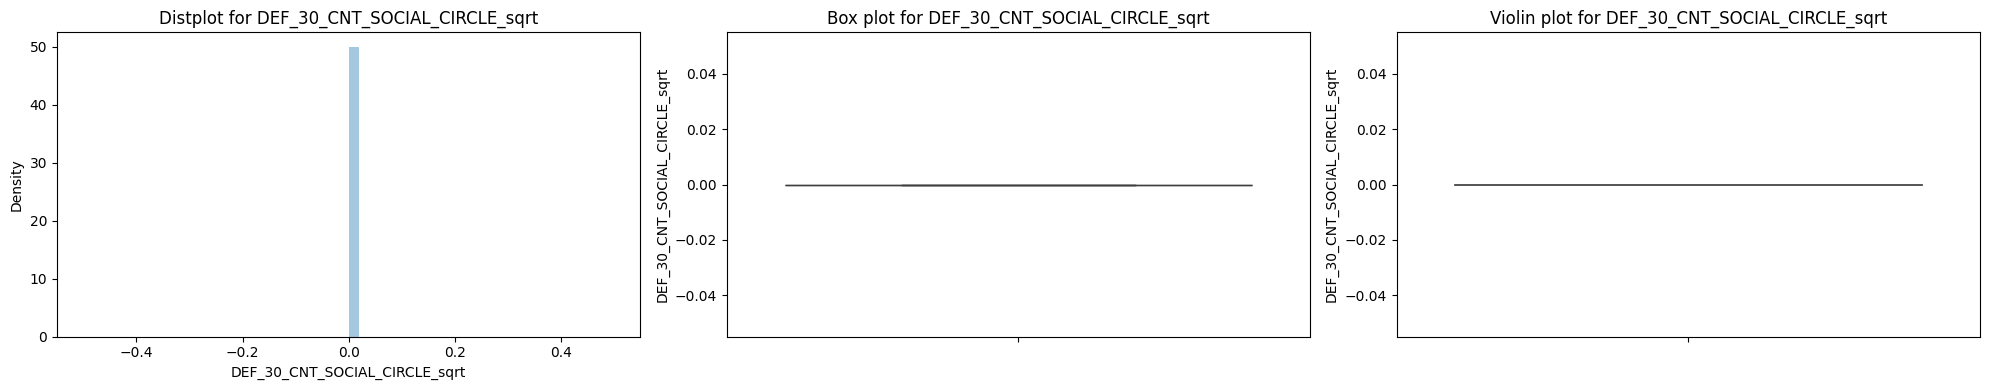

In [ ]:
for i in outlier_columns:
  skewplot(df4,i)

In [ ]:
dff = df4[['AMT_INCOME_TOTAL_sqrt','CODE_GENDER_sqrt','FLAG_OWN_CAR_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt', 'DAYS_EMPLOYED_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt', 'AMT_GOODS_PRICE_x_sqrt','NAME_HOUSING_TYPE_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',"TARGET"]]

In [ ]:
# Check for constant columns
constant_columns = [col for col in dff.columns if dff[col].nunique() <= 1]
print("Constant Columns:", constant_columns)

# Check for NaN values
nan_columns = dff.columns[dff.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Constant Columns: ['DAYS_EMPLOYED_sqrt', 'NAME_FAMILY_STATUS_sqrt', 'NAME_HOUSING_TYPE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt']
Columns with NaN values: ['DAYS_EMPLOYED_sqrt']


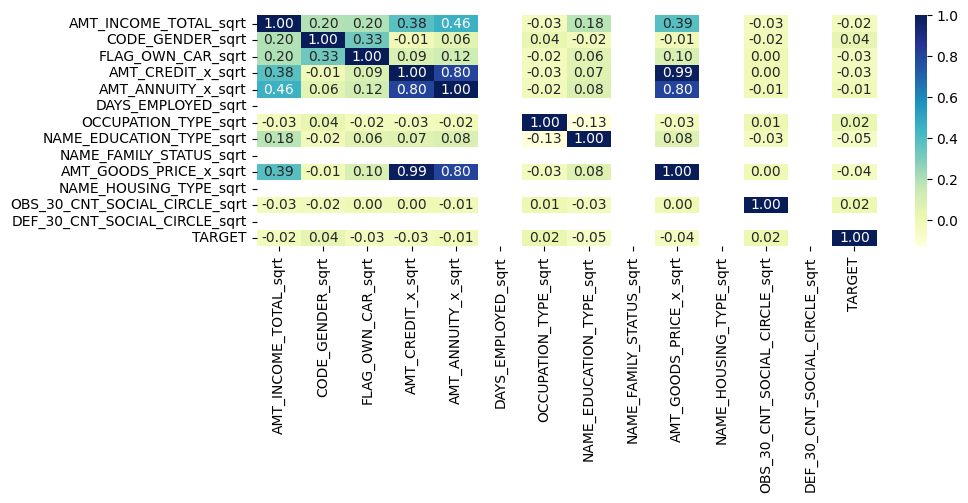

In [ ]:
# Calculate the correlation matrix
corr = dff.corr()

# Plot the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(corr, annot=True, fmt=".2f",cmap="YlGnBu")
plt.show()

In [ ]:
#Dropping amount credit sqrt as it has more above 1 correlation.

dff = dff.drop(columns=["AMT_CREDIT_x_sqrt"])


In [ ]:
dff.describe().T


,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL_sqrt,956121.0,410.780216,92.786007,160.156174,335.410197,396.862697,474.341649,682.738828
CODE_GENDER_sqrt,956121.0,0.376668,0.484569,0.000000,0.000000,0.000000,1.000000,1.414214
FLAG_OWN_CAR_sqrt,956121.0,0.382428,0.485980,0.000000,0.000000,0.000000,1.000000,1.000000
AMT_ANNUITY_x_sqrt,956121.0,161.307973,40.332601,48.095474,132.323467,161.122624,188.475463,272.703456
DAYS_EMPLOYED_sqrt,24.0,604.353373,0.000000,604.353373,604.353373,604.353373,604.353373,604.353373
OCCUPATION_TYPE_sqrt,956121.0,2.651208,0.948375,0.025063,2.000000,2.828427,3.316625,4.123106
NAME_EDUCATION_TYPE_sqrt,956121.0,0.302045,0.494169,0.000000,0.000000,0.000000,1.000000,2.000000
NAME_FAMILY_STATUS_sqrt,956121.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AMT_GOODS_PRICE_x_sqrt,956121.0,693.906547,231.220279,201.246118,497.493719,670.820393,827.042925,1321.366735
NAME_HOUSING_TYPE_sqrt,956121.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Now we can proceed with Model building as all EDA and Preprocessing completed

In [ ]:
values = dff.drop('TARGET', axis=1)
tar = dff['TARGET']

In [ ]:
ro = RandomOverSampler(random_state= 40)

In [ ]:
re_data, re_tar = ro.fit_resample(values, tar)
re_data['TARGET'] = re_tar
re_data['TARGET'].value_counts()

,count
TARGET,
1,865635
0,865635


In [ ]:
re_data.shape

(1731270, 13)

In [ ]:
val = re_data.drop('TARGET', axis=1)
tar = re_data['TARGET']

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(val, tar, test_size= 0.2, random_state=40)


In [ ]:
dfg = df4[['AMT_INCOME_TOTAL_sqrt','CODE_GENDER_sqrt','FLAG_OWN_CAR_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt','NAME_HOUSING_TYPE_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',"TARGET"]]

In [ ]:
value = dfg.drop('TARGET', axis=1)
targ = dfg['TARGET']
ro = RandomOverSampler(random_state= 40)
re_data, re_tar = ro.fit_resample(value, targ)
re_data['TARGET'] = re_tar

va = re_data.drop('TARGET', axis=1)
ta = re_data['TARGET']
X1_train, X1_test, y1_train, y1_test  = train_test_split(va, ta, test_size= 0.2, random_state=40)

In [ ]:
re_data.shape


(1731270, 12)

In [ ]:
#Implement the classifiers to check which is best
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X1_train, y1_train)

# Predict the labels
y_pred = knn.predict(X1_test)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y1_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9791338150606202
Confusion Matrix:
[[166801   6349]
 [   876 172228]]


In [ ]:
#Since we found some constant & NaN values earlier in the df, for Overfitting verification we're checking train and test models accuracy.

In [ ]:
y_pred_train = knn.predict(X1_train)
y_pred_test = knn.predict(X1_test)

# Step 3: Calculate accuracy
train_accuracy = accuracy_score(y1_train, y_pred_train)
test_accuracy = accuracy_score(y1_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9857763376018761
Test Accuracy: 0.9791338150606202


In [ ]:
#Train Accuracy is nearer to Test Accuracy with 0.01 difference so our model isn't overfitting. Now we can proceed with the further evaluation

Confusion Matrix:
[[166801   6349]
 [   876 172228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    173150
           1       0.96      0.99      0.98    173104

    accuracy                           0.98    346254
   macro avg       0.98      0.98      0.98    346254
weighted avg       0.98      0.98      0.98    346254



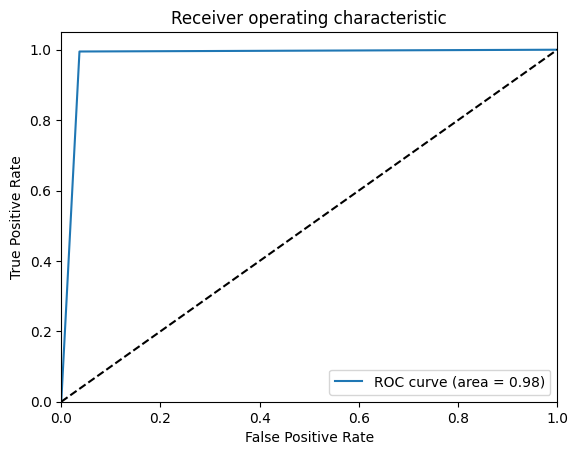

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))
false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
''' 'AMT_INCOME_TOTAL_sqrt','CODE_GENDER_sqrt','FLAG_OWN_CAR_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt','NAME_HOUSING_TYPE_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',"TARGET" '''

' \'AMT_INCOME_TOTAL_sqrt\',\'CODE_GENDER_sqrt\',\'FLAG_OWN_CAR_sqrt\',\n       \'AMT_CREDIT_x_sqrt\', \'AMT_ANNUITY_x_sqrt\',\n       \'OCCUPATION_TYPE_sqrt\', \'NAME_EDUCATION_TYPE_sqrt\',\n       \'NAME_FAMILY_STATUS_sqrt\',\'NAME_HOUSING_TYPE_sqrt\',\n       \'OBS_30_CNT_SOCIAL_CIRCLE_sqrt\', \'DEF_30_CNT_SOCIAL_CIRCLE_sqrt\',"TARGET" '

In [ ]:
#Now check with the sample values whether this model predicts the status

In [ ]:
sample = np.array([[np.sqrt(135000.0),0,1,np.sqrt(312682.5),np.sqrt(29686.5),7,2,1,5,np.sqrt(1.0),np.sqrt (2.0)]])
pred = knn.predict(sample)
if pred==0:
    print('The status is: Repay')
else:
    print('The status is: Wont Repay')   # sample prediction # correct prediction

The status is: Repay


In [ ]:
sample = np.array([[np.sqrt(202500.0),0,1,np.sqrt(406597.5),np.sqrt(24700.5),8,0,3,7,np.sqrt(2.0),np.sqrt (2.0)]])
pred = knn.predict(sample)
if pred==0:
    print('The status is: Repay')
else:
    print('The status is: Wont Repay')

The status is: Wont Repay


In [ ]:
# Decision tree


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=5
)

# Fit
decision_tree.fit(X1_train_scaled, y1_train)

# Predict the labels
y_pred = decision_tree.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y1_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9208817804270854
Confusion Matrix:
[[153053  20097]
 [  7298 165806]]


Confusion Matrix:
[[153053  20097]
 [  7298 165806]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92    173150
           1       0.89      0.96      0.92    173104

    accuracy                           0.92    346254
   macro avg       0.92      0.92      0.92    346254
weighted avg       0.92      0.92      0.92    346254



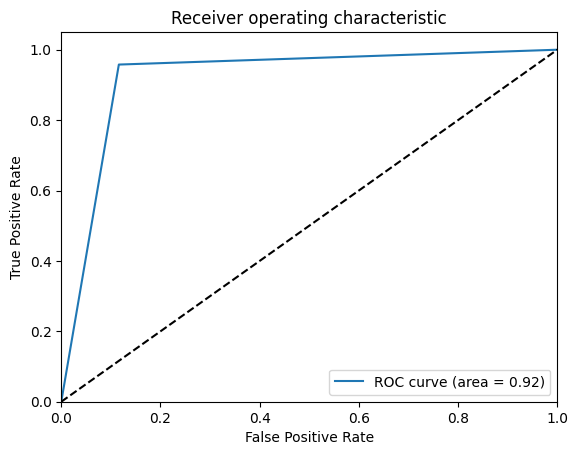

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))
false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')                                           #  DECISON TREE
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
 # Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X1_train_scaled = scaler2.fit_transform(X1_train)
X1_test_scaled = scaler2.transform(X1_test)

random_forest = RandomForestClassifier(
    max_depth=18,
    min_samples_split=15,
    min_samples_leaf=8,
    criterion='gini',
    max_features='sqrt'
)

# Fit
random_forest.fit(X1_train_scaled, y1_train)

# Predict
y_pred_rf = random_forest.predict(X1_test_scaled)

# Evaluate the classifier
accuracy_rf = accuracy_score(y1_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
cm_rf = confusion_matrix(y1_test, y_pred_rf)
print(f"Confusion Matrix:\n{cm_rf}")

Accuracy: 0.904899293582168
Confusion Matrix:
[[149223  23927]
 [  9002 164102]]


Confusion Matrix:
[[153053  20097]
 [  7298 165806]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92    173150
           1       0.89      0.96      0.92    173104

    accuracy                           0.92    346254
   macro avg       0.92      0.92      0.92    346254
weighted avg       0.92      0.92      0.92    346254



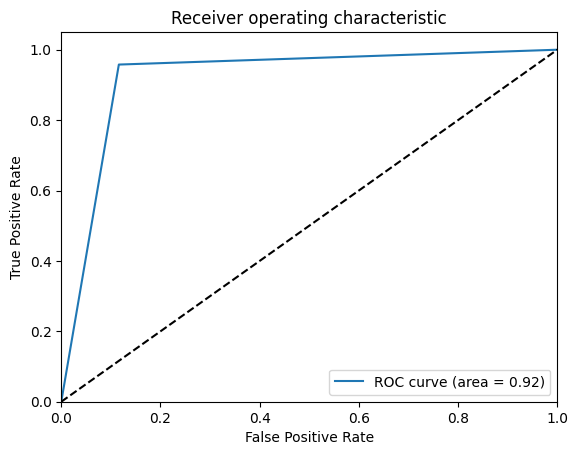

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))
false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 1.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from xgboost import XGBClassifier   # xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
X1_train_scaled = scaler3.fit_transform(X1_train)
X1_test_scaled = scaler3.transform(X1_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                    n_estimators=550,
                    max_depth=8,
                    learning_rate=0.4,
                    subsample=0.9,
                    colsample_bytree=0.9)

# Fit
xgb.fit(X1_train_scaled, y1_train)

# Predict
y_pred = xgb.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y1_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9447313244034726
Confusion Matrix:
[[160060  13090]
 [  6047 167057]]


Confusion Matrix:
[[160060  13090]
 [  6047 167057]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94    173150
           1       0.93      0.97      0.95    173104

    accuracy                           0.94    346254
   macro avg       0.95      0.94      0.94    346254
weighted avg       0.95      0.94      0.94    346254



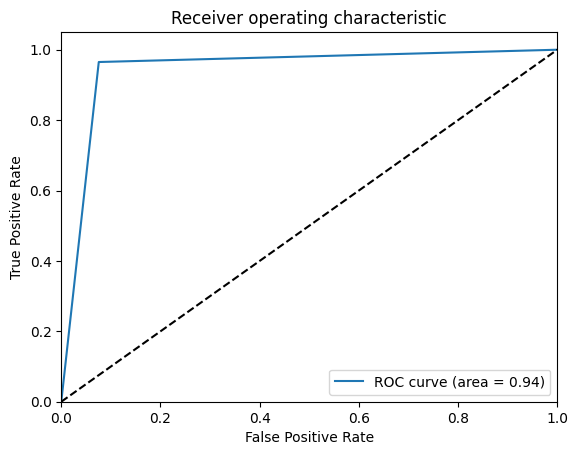

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))

false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Saving the model
import pickle
with open('knnmodel.pkl', 'wb') as file:
    pickle.dump(knn, file)

with open('dtmodel.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)

with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

with open('xgbmodel.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [ ]:
with open('dtscaler.pkl', 'wb') as f:
    pickle.dump(scaler1, f)
with open('rfscaler.pkl', 'wb') as f:
    pickle.dump(scaler2, f)
with open('xgbscaler.pkl', 'wb') as f:
    pickle.dump(scaler3, f)

In [ ]:
sample = np.array([[np.sqrt(202500.0),1,0,np.sqrt(406597.5),np.sqrt(24700.5),8,8,0,3,np.sqrt(2.0),np.sqrt (2.0)]])
pred = xgb.predict(sample)
if pred==1:
    print('The status is: Repay')
else:
    print('The status is: Wont Repay')

The status is: Wont Repay


In [ ]:
#From the above analysis and evaluations, All ML models are performing well so we can use any one of the model for our default prediction process.
# All our model scores(Accuracy, Precision, Recall & F1-score) are above 87% as per the above complete analysis.

In [ ]:
# For simpler purpose, I'm taking KNN model for UI prediction.
# Also in ROC summary, KNN provides the best classification performance with 0.98

In [ ]:
df4["CODE_GENDER"].unique()


array([1, 0, 2])

In [ ]:
#Save the final model in csv format

In [ ]:
df4.to_csv('final_data.csv',index=False)
